# Prosper Loan Exploratory Data Analysis

## By Mohamed Ali

## Introduction

>This project is part of Udacity's Nanodegree Program for Data Analysts. I conducted exploratory data analysis (EDA) on Prosper's data set. Prosper is the first market lending platform in the United States, with financing loans exceeding 9 billion US dollars. The data set contains 113,937 loans. Each loan has 81 variables, including loan amount, borrower's interest rate (or interest rate), current loan status, borrower's income, borrower's employment status, borrower's credit history, and the latest payment information.

## Explore Your Data

Import all packages and set plots to be embedded inline

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

load in the dataset into a pandas dataframe

In [2]:
loan = pd.read_csv('prosperLoanData.csv')

High-level overview of data shape and composition

In [3]:
loan.shape

(113937, 81)

In [4]:
loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

Print Over View

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Data Assessing and Cleaning

### What is the structure of your dataset?

The dataset has 113,937 loans with 81 variables on each loan. I will be interested in a subset of those variables. The dataset contains 84853 loans with 28 features including  ListingCreationDate, LoanOriginalAmount, LoanStatus, ListingCategory (numeric), BorrowerState, BorrowerAPR, BorrowerRate,StatedMonthlyIncome, ProsperRating (Alpha), ProsperScore, LoanMonthsSinceOrigination, Occupation, Term, EmploymentStatus , TotalInquiries, DebtToIncomeRatio, MonthlyLoanPayment , TotalTrades, Investors, IsBorrowerHomeowner, CreditScoreRangeLower, AvailableBankcardCredit, IncomeRange and others. Variables are loan information and borrower information.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting borrower's Annual Percentage Rate (Borrower APR) for the loan and affecting the loan status and how employment status and debtToIncome ratio associates with various metrics in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To study the borrower interest rate and loan status, I included  ListingCreationDate and some borrower information such as Occupation, Term, EmploymentStatus,  AvailableBankcardCredit, CreditGrade, StatedMonthlyIncome and  DebtToIncomeRatio.

1.choose subset of features important

2.drop duplicated rows based on listing number

3.convert datatypes of TotalTrades and TotalInquiries to int , ListingCreationDate to datetime

4.removed rows without ProsperRating

5.fill in missing values of occupation and DebtToIncomeRatio

6.change listing category numeric to string.

Subset of the dataframe by selecting features

In [6]:
cols = ['ListingNumber','ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 'ProsperScore','LoanMonthsSinceOrigination',
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors','IsBorrowerHomeowner','CreditScoreRangeLower','AvailableBankcardCredit','IncomeRange']
df = loan[cols]

display information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingNumber               113937 non-null  int64  
 1   ListingCreationDate         113937 non-null  object 
 2   LoanOriginalAmount          113937 non-null  int64  
 3   LoanStatus                  113937 non-null  object 
 4   ListingCategory (numeric)   113937 non-null  int64  
 5   BorrowerState               108422 non-null  object 
 6   BorrowerAPR                 113912 non-null  float64
 7   BorrowerRate                113937 non-null  float64
 8   StatedMonthlyIncome         113937 non-null  float64
 9   ProsperRating (Alpha)       84853 non-null   object 
 10  ProsperScore                84853 non-null   float64
 11  LoanMonthsSinceOrigination  113937 non-null  int64  
 12  Occupation                  110349 non-null  object 
 13  Term          

display random rows to get better understanding of the dataset and errors present

In [8]:
df.sample(10)

ListingNumber            ListingCreationDate  LoanOriginalAmount  \
18280          547056  2011-12-27 16:00:37.403000000                2000   
52024          851616  2013-07-26 08:06:33.663000000                3700   
96709          449408  2010-03-07 16:57:17.447000000                1500   
101496         925294  2013-09-27 11:10:46.067000000               10000   
109612        1036716  2013-11-18 06:40:51.407000000               15000   
2736           565659  2012-03-05 18:03:12.490000000                3500   
111            569416  2012-03-17 04:34:26.593000000                4000   
1695           160854  2007-06-30 07:26:32.760000000               15001   
3639           420662  2009-08-14 13:54:25.877000000                1500   
43599          540520  2011-11-22 06:20:32.457000000                7500   

        LoanStatus  ListingCategory (numeric) BorrowerState  BorrowerAPR  \
18280    Completed                          1            NV      0.35285   
52024      Current                          1            OK      0.26877   
96709    Completed                          2            MI      0.35699   
101496     Current                          2            GA      0.27257   
109612     Current                          1            MO      0.16969   
2736       Current                          7            CA      0.33553   
111        Current                          6            IN      0.28370   
1695    Chargedoff                          0            KY      0.15602   
3639     Completed                          1            DC      0.13745   
43599    Completed                          6            MA      0.35090   

        BorrowerRate  StatedMonthlyIncome ProsperRating (Alpha)  ...  \
18280         0.3127          3416.666667                    HR  ...   
52024         0.2432          1916.666667                     D  ...   
96709         0.3300          1840.000000                    HR  ...   
101496        0.2469          3750.000000                     D  ...   
109612        0.1465         10833.333333                     B  ...   
2736          0.2958          4333.333333                     E  ...   
111           0.2452          3000.000000                     D  ...   
1695          0.1489          3333.333333                   NaN  ...   
3639          0.1138          4000.000000                     A  ...   
43599         0.3108          4766.666667                     E  ...   

        EmploymentStatus  TotalInquiries DebtToIncomeRatio  \
18280           Employed             2.0              0.62   
52024           Employed             1.0              0.16   
96709          Full-time             2.0              0.86   
101496          Employed             1.0              0.08   
109612          Employed             3.0              0.44   
2736            Employed             0.0              0.18   
111             Employed             0.0              0.05   
1695           Full-time             4.0              0.41   
3639           Full-time             4.0              0.07   
43599           Employed             7.0              0.32   

        MonthlyLoanPayment TotalTrades  Investors  IsBorrowerHomeowner  \
18280                86.30        46.0          4                 True   
52024               107.13        12.0          1                False   
96709                61.92        15.0         36                False   
101496              291.70         8.0          1                 True   
109612              354.10        43.0          1                 True   
2736                147.78         8.0          5                False   
111                 158.03         7.0         48                 True   
1695                519.21        20.0        363                False   
3639                  0.00        14.0         44                False   
43599               322.84        12.0         14                False   

        CreditScoreRangeLower  AvailableBan

Check for Duplicate

In [9]:
df.duplicated().sum()

0

In [10]:
# drop duplicates in the dataset
df.drop_duplicates(keep=False,inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingNumber               113937 non-null  int64  
 1   ListingCreationDate         113937 non-null  object 
 2   LoanOriginalAmount          113937 non-null  int64  
 3   LoanStatus                  113937 non-null  object 
 4   ListingCategory (numeric)   113937 non-null  int64  
 5   BorrowerState               108422 non-null  object 
 6   BorrowerAPR                 113912 non-null  float64
 7   BorrowerRate                113937 non-null  float64
 8   StatedMonthlyIncome         113937 non-null  float64
 9   ProsperRating (Alpha)       84853 non-null   object 
 10  ProsperScore                84853 non-null   float64
 11  LoanMonthsSinceOrigination  113937 non-null  int64  
 12  Occupation                  110349 non-null  object 
 13  Term          

Selecting rows only where ProsperRating is not null as this is one of the most important features of the dataset and filling the missing values is not possible.

In [13]:
df = df[df['ProsperRating (Alpha)'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ListingNumber               84853 non-null  int64  
 1   ListingCreationDate         84853 non-null  object 
 2   LoanOriginalAmount          84853 non-null  int64  
 3   LoanStatus                  84853 non-null  object 
 4   ListingCategory (numeric)   84853 non-null  int64  
 5   BorrowerState               84853 non-null  object 
 6   BorrowerAPR                 84853 non-null  float64
 7   BorrowerRate                84853 non-null  float64
 8   StatedMonthlyIncome         84853 non-null  float64
 9   ProsperRating (Alpha)       84853 non-null  object 
 10  ProsperScore                84853 non-null  float64
 11  LoanMonthsSinceOrigination  84853 non-null  int64  
 12  Occupation                  83520 non-null  object 
 13  Term                        84

Filling the missing values of DebtToIncomeRatio as mean of the column

In [14]:
df.DebtToIncomeRatio = df.DebtToIncomeRatio.fillna(df.DebtToIncomeRatio.mean())

Filling missing values for the Occupation as unknown

In [15]:
df.Occupation = df.Occupation.fillna('Unknown')

Transform ListingCreation Data into multiple columns using date time.

In [16]:
df['Date'] = pd.to_datetime(df['ListingCreationDate'])
#df['Time'] = pd.to_datetime(df.Date, format = '%Y/%m/%d %I:%M:%S %p',errors='coerce').dt.time
df['year'] = pd.to_datetime(df.Date).apply(lambda x: x.year)
df['month'] = pd.to_datetime(df.Date).apply(lambda x: x.month)
df['day'] = pd.to_datetime(df.Date).apply(lambda x: x.day)
df['mnth_yr'] = df['Date'].apply(lambda x: x.strftime('%B-%Y')) 

### Did you create any new variables from existing variables in the dataset?
Yes, I first created a Datetime variable ‘ListingDateTime’ in format of  ‘yyyy-mm-dd’ to indicate the loan listing date.


## Exploratory Data Analysis

Overview of data after cleaning it.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ListingNumber               84853 non-null  int64         
 1   ListingCreationDate         84853 non-null  object        
 2   LoanOriginalAmount          84853 non-null  int64         
 3   LoanStatus                  84853 non-null  object        
 4   ListingCategory (numeric)   84853 non-null  int64         
 5   BorrowerState               84853 non-null  object        
 6   BorrowerAPR                 84853 non-null  float64       
 7   BorrowerRate                84853 non-null  float64       
 8   StatedMonthlyIncome         84853 non-null  float64       
 9   ProsperRating (Alpha)       84853 non-null  object        
 10  ProsperScore                84853 non-null  float64       
 11  LoanMonthsSinceOrigination  84853 non-null  int64    

In [18]:
df.head()

ListingNumber            ListingCreationDate  LoanOriginalAmount  \
1        1209647  2014-02-27 08:28:07.900000000               10000   
3         658116  2012-10-22 11:02:35.010000000               10000   
4         909464  2013-09-14 18:38:39.097000000               15000   
5        1074836  2013-12-14 08:26:37.093000000               15000   
6         750899  2013-04-12 09:52:56.147000000                3000   

  LoanStatus  ListingCategory (numeric) BorrowerState  BorrowerAPR  \
1    Current                          2            CO      0.12016   
3    Current                         16            GA      0.12528   
4    Current                          2            MN      0.24614   
5    Current                          1            NM      0.15425   
6    Current                          1            KS      0.31032   

   BorrowerRate  StatedMonthlyIncome ProsperRating (Alpha)  ...  Investors  \
1        0.0920          6125.000000                     A  ...          1   
3        0.0974          2875.000000                     A  ...        158   
4        0.2085          9583.333333                     D  ...         20   
5        0.1314          8333.333333                     B  ...          1   
6        0.2712          2083.333333                     E  ...          1   

   IsBorrowerHomeowner CreditScoreRangeLower  AvailableBankcardCredit  \
1                False                 680.0                  10266.0   
3                 True                 800.0                  30754.0   
4                 True                 680.0                    695.0   
5                 True                 740.0                  86509.0   
6                False                 680.0                   1929.0   

      IncomeRange                    Date  year  month  day         mnth_yr  
1  $50,000-74,999 2014-02-27 08:28:07.900  2014      2   27   February-2014  
3  $25,000-49,999 2012-10-22 11:02:35.010  2012     10   22    October-2012  
4       $100,000+ 2013-09-14 18:38:39.097  2013      9   14  September-2013  
5       $100,000+ 2013-12-14 08:26:37.093  2013     12   14   December-2013  
6  $25,000-49,999 2013-04-12 09:52:56.147  2013      4   12      April-2013  

[5 rows x 29 columns]

Summary Statisitics

In [19]:
df.describe()

ListingNumber  LoanOriginalAmount  ListingCategory (numeric)  \
count   8.485300e+04        84853.000000               84853.000000   
mean    7.738749e+05         9083.440515                   3.312647   
std     2.363387e+05         6287.860058                   4.364277   
min     4.162750e+05         1000.000000                   0.000000   
25%     5.580860e+05         4000.000000                   1.000000   
50%     7.392460e+05         7500.000000                   1.000000   
75%     9.794360e+05        13500.000000                   3.000000   
max     1.255725e+06        35000.000000                  20.000000   

        BorrowerAPR  BorrowerRate  StatedMonthlyIncome  ProsperScore  \
count  84853.000000  84853.000000         8.485300e+04  84853.000000   
mean       0.226658      0.196022         5.931175e+03      5.950067   
std        0.079916      0.074631         8.239944e+03      2.376501   
min        0.045830      0.040000         0.000000e+00      1.000000   
25%        0.163280      0.135900         3.434000e+03      4.000000   
50%        0.219450      0.187500         5.000000e+03      6.000000   
75%        0.292540      0.257400         7.083333e+03      8.000000   
max        0.423950      0.360000         1.750003e+06     11.000000   

       LoanMonthsSinceOrigination          Term  TotalInquiries  \
count                84853.000000  84853.000000    84853.000000   
mean                    16.023452     42.486135        4.290396   
std                     13.897523     11.640346        3.827574   
min                      0.000000     12.000000        0.000000   
25%                      4.000000     36.000000        2.000000   
50%                     11.000000     36.000000        3.000000   
75%                     25.000000     60.000000        6.000000   
max                     56.000000     60.000000       78.000000   

       DebtToIncomeRatio  MonthlyLoanPayment   TotalTrades     Investors  \
count       84853.000000        84853.000000  84853.000000  84853.000000   
mean            0.258752          291.930720     23.928571     68.264669   
std             0.304333          186.678314     11.607638     95.195831   
min             0.000000            0.000000      1.000000      1.000000   
25%             0.160000          157.330000     16.000000      1.000000   
50%             0.240000          251.940000     23.000000     32.000000   
75%             0.310000          388.350000     31.000000     97.000000   
max            10.010000         2251.510000    122.000000   1189.000000   

       CreditScoreRangeLower  AvailableBankcardCredit          year  \
count           84853.000000             84853.000000  84853.000000   
mean              699.390240             11400.695355   2012.328156   
std                47.095937             18610.424333      1.200926   
min               600.000000                 0.000000   2009.000000   
25%               660.000000              1148.000000   2012.000000   
50%               700.000000              4574.000000   2013.000000   
75%               720.000000             13910.000000   2013.000000   
max               880.000000            498374.000000   2014.000000   

              month           day  
count  84853.000000  84853.000000  
mean       6.705785     15.499888  
std        3.664448      8.647313  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        7.000000     16.000000  
75%       10.000000     23.000000  
max       12.000000     31.000000

**Distribution of Borrower State**

**Borrower State** : The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

The Highest BorrowerState is CA (California)

In [20]:
map1 = df.groupby('BorrowerState').size().reset_index(name='counts').sort_values(by='counts',ascending = False)

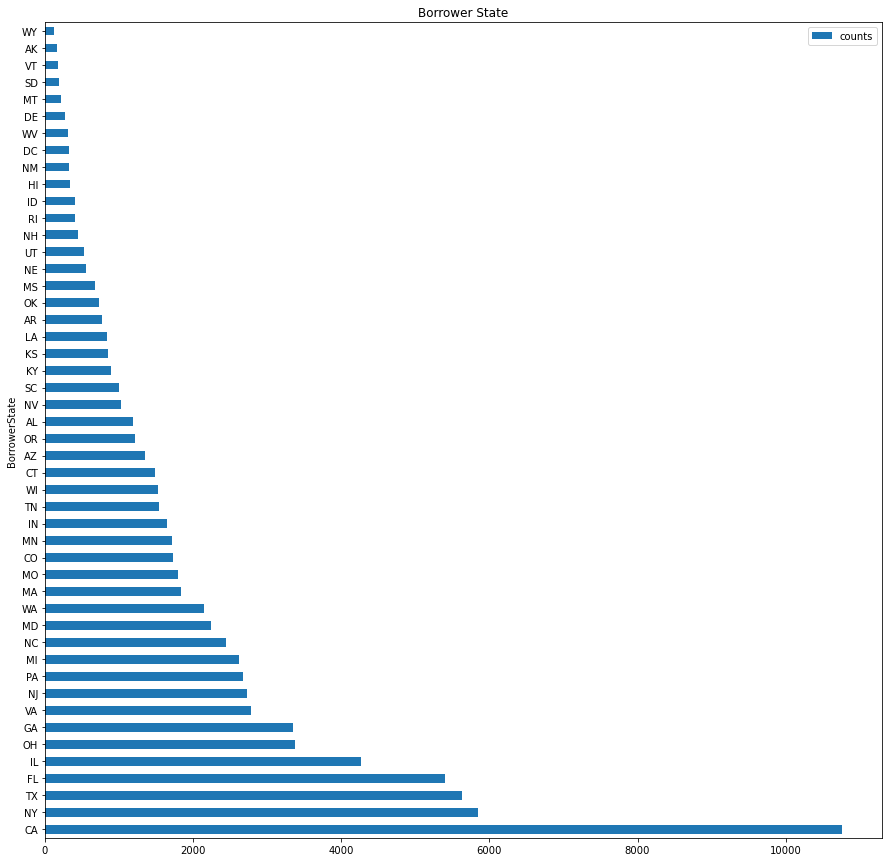

In [21]:
ax = map1.plot.barh(x='BorrowerState', y='counts',figsize=(15,15)).set_title("Borrower State")

**Distribution of Number of Loans listed Year, Month and Day**

It seems like in 2012 & 2013 increase compare to other years January has the highest number of loans listed as expected from starting of new year , whereas april sees the least number of loans listed. There is no difference in number of loans over days and the descrease in 31th day because it only comes six times in a year have the other days.

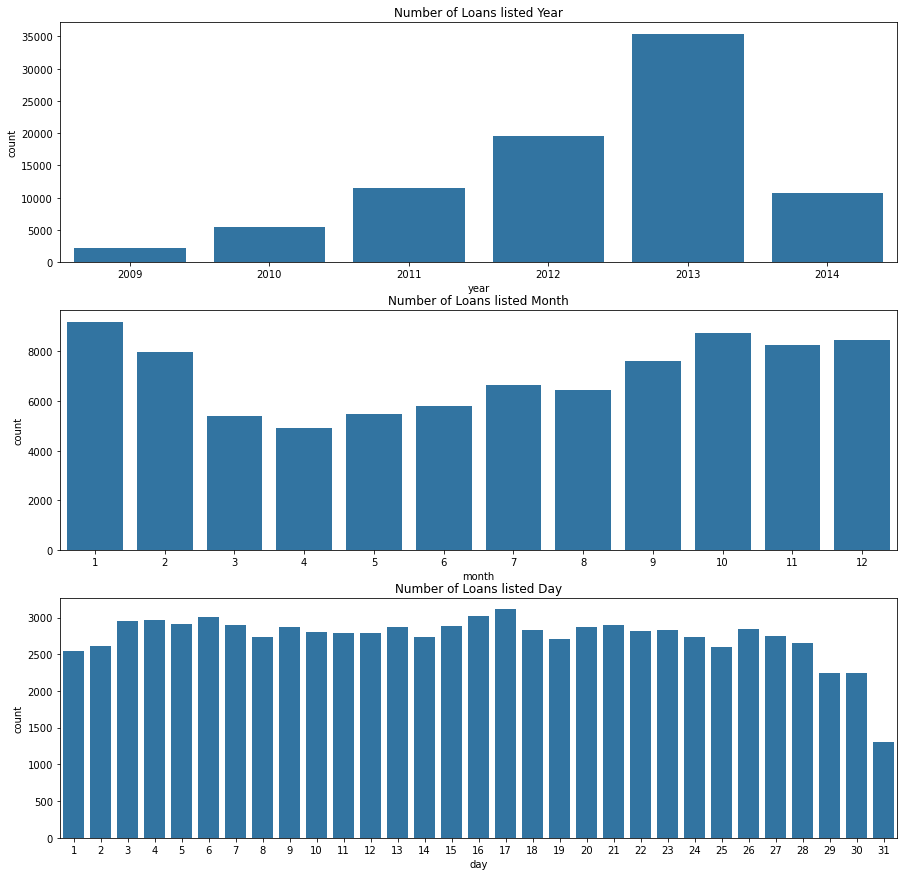

In [22]:
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'year', color = default_color, ax = ax[0]).set_title("Number of Loans listed Year");
sb.countplot(data = df, x = 'month', color = default_color, ax = ax[1]).set_title("Number of Loans listed Month");
sb.countplot(data = df, x = 'day', color = default_color, ax = ax[2]).set_title("Number of Loans listed Day");

**Distribution of Debt To Income Ratio**

**DebtToIncomeRatio** : The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

Distribution has unimodal peak around 0.2 with unusual peak around 0.25 which indicates most people prefer 1:4 ratio of debt to Income which is a good thing.

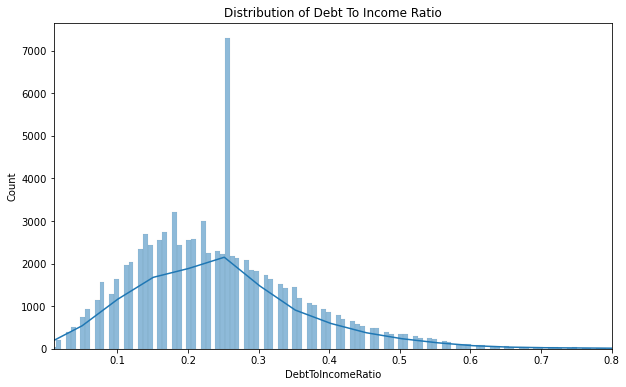

In [23]:
plt.figure(figsize = [10, 6])
gg = sb.histplot(data = df, x = 'DebtToIncomeRatio', color = default_color, kde=True);
gg.set_xlim(0.01,0.8)
gg.set_title("Distribution of Debt To Income Ratio")
plt.xlabel('DebtToIncomeRatio');

**Distribution of Original loan amount ($)**

**LoanOriginalAmount** : The origination amount of the loan.

We see that the most freq. amount of loan about 4k also there a multiple peaks at spicific amount 10k, 15k ,20k ,25k ,30k & 35k

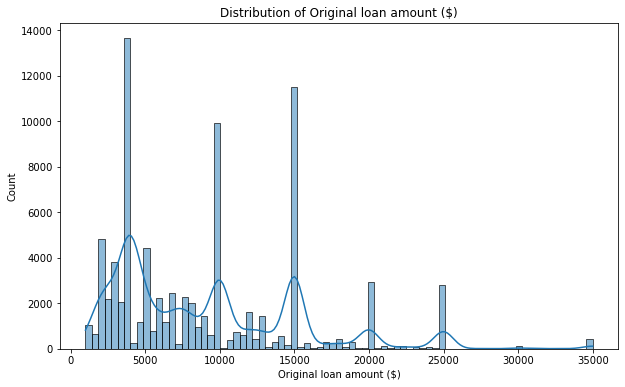

In [24]:
plt.figure(figsize = [10, 6])
gg = sb.histplot(data = df, x = 'LoanOriginalAmount', color = default_color, kde=True);
gg.set_title("Distribution of Original loan amount ($)")
plt.xlabel('Original loan amount ($)');

**Distribution of Borrower's Annual Percentage Rate - Distribution of Borrower Rate**

**The BorrowerRate** : (interest rate) refers to the annual cost of a loan to  a borrower and is expressed as a percentage. The interest rate does not  include fees charged for the loan. 

**The BorrowerAPR** : is the annual cost of a loan to a borrower. Unlike an interest rate, it includes other charges or fees (such as mortgage  insurance, most closing costs, discount points and loan origination  fees) to reflect the total cost of the loan.

BorrowerRate should be similar with  slight difference since the APR is always higher than the interest rate.
So that borrower's Annual Percentage Rate greater than Borrower Rate

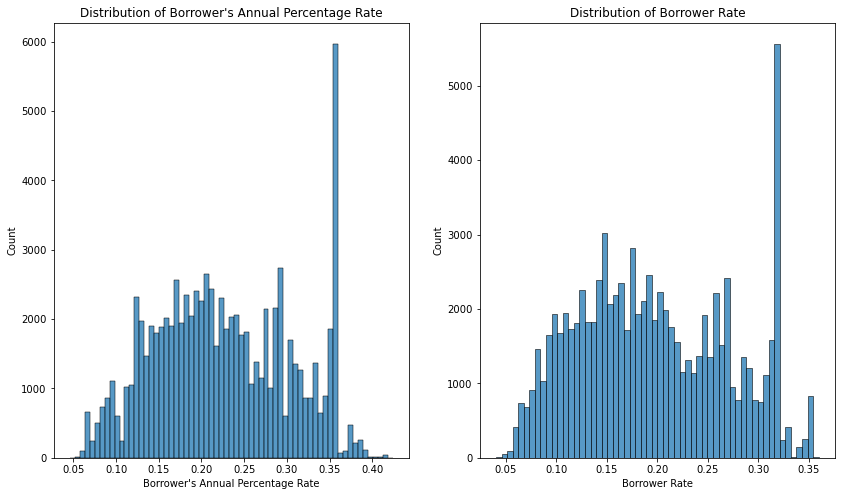

In [25]:
plt.subplots(figsize = [14,8])
plt.subplot(1, 2, 1)
g = sb.histplot(data = df, x = 'BorrowerAPR', color = default_color);
plt.xlabel('Borrower\'s Annual Percentage Rate');
plt.title('Distribution of Borrower\'s Annual Percentage Rate');
plt.subplot(1, 2, 2)
g = sb.histplot(data = df, x = 'BorrowerRate', color = default_color);
plt.xlabel('Borrower Rate');
plt.title('Distribution of Borrower Rate');

**Distribution of Loan Months Since Origination**

**Loan Months Since Origination** : Number of months since the loan originated.

Most loans end up in three periods around 18th , 38th and all end in 60th months period from Originathion.

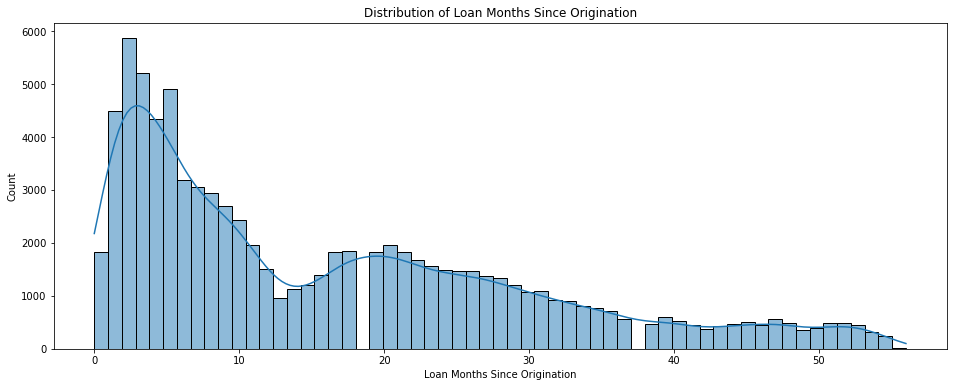

In [26]:
plt.figure(figsize = [16, 6])
gg = sb.histplot(data = df, x = 'LoanMonthsSinceOrigination', color = default_color, kde=True);
plt.xlabel('Loan Months Since Origination');
plt.title('Distribution of Loan Months Since Origination');

**Distribution of ProsperRating (Alpha), ProsperRating (numeric) and Employment Status**

**ProsperRating (Alpha)** : The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

The ratings of most of the borrowers are among D to A with the most of all C. 

**ProsperRating (numeric)** : The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

It's observed that degree of risk between 4 : 8 It's not good but also not bad which the most common rate is 8

**EmploymentStatus** : The employment status of the borrower at the time they posted the listing.

Most of borrowers are employed then comes full-time second with a big difference.

In [27]:
ratings_ordered = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

df['ProsperRating (Alpha)'] = pd.Categorical(df['ProsperRating (Alpha)'], categories=ratings_ordered, ordered=True)

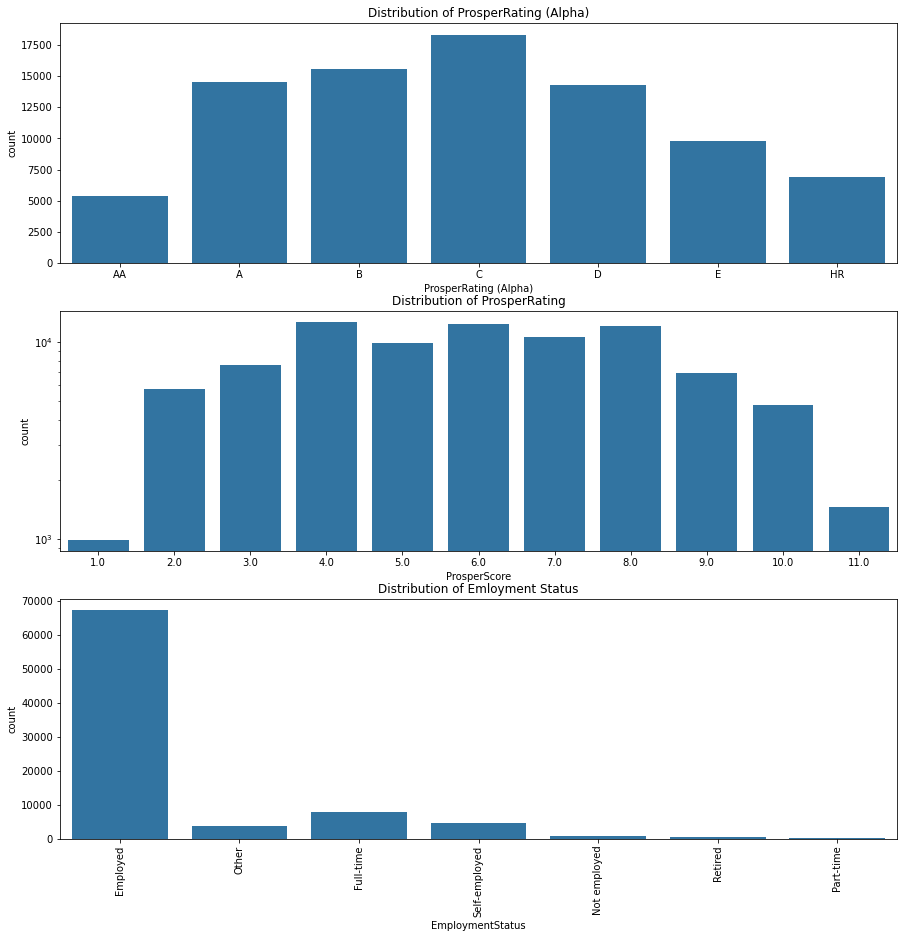

In [28]:
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0]).set_title("Distribution of ProsperRating (Alpha)");
gg = sb.countplot(data = df, x = 'ProsperScore', color = default_color, ax = ax[1]);
gg.set_yscale("log");
gg.set_title("Distribution of ProsperRating")
sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[2]).set_title("Distribution of Emloyment Status");
plt.xticks(rotation=90);

### The features you investigated, were there any unusual distributions?

The StatedMonthlyIncome is highly right skewed. To find the outliers that  drive data to the left, I used summary function and find that the maximum  value is 1750000, which is likely to be an error. So in the next plot, I  removed the top 1% data from the original and got a more reasonable plot.

**Distribution of Stated Monthly Income**

**Stated Monthly Income** : The monthly income the borrower stated at the time the listing was created.

The histogram plot of the original data is highly right skewed. To find the  outliers that drive data to the left, I used describe function and find that  the maximum value is 1750000 which highly affect the result and dose not describe data accurately as 75% is 7000.

I removed the top 1% data from the original and got a more reasonable plot around 4k.

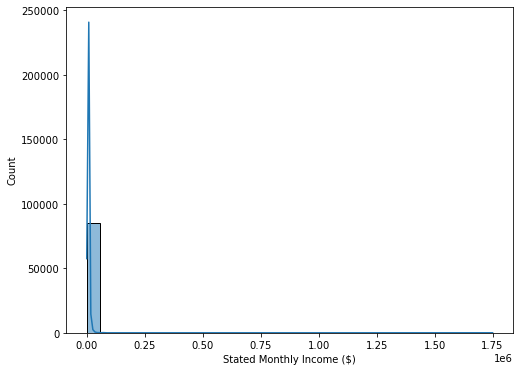

In [29]:
plt.figure(figsize = [8, 6])
sb.histplot(data = df, x = 'StatedMonthlyIncome', bins=30, kde=True)
plt.xlabel('Stated Monthly Income ($)');

In [30]:
df['StatedMonthlyIncome'].describe()

count    8.485300e+04
mean     5.931175e+03
std      8.239944e+03
min      0.000000e+00
25%      3.434000e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [31]:
Income = df.sort_values(by='StatedMonthlyIncome',ascending = False)
Income.head()

ListingNumber            ListingCreationDate  LoanOriginalAmount  \
53167         560783  2012-02-20 12:53:44.577000000                4000   
53014         694401  2013-01-04 20:02:24.207000000                4000   
17411         501462  2011-04-08 21:58:21.847000000                7500   
57133         499194  2011-03-24 14:50:00.220000000                4000   
8066          500651  2011-04-02 13:58:32.227000000                2000   

      LoanStatus  ListingCategory (numeric) BorrowerState  BorrowerAPR  \
53167    Current                          3            OR      0.35797   
53014  Completed                          3            CA      0.25785   
17411  Completed                          1            HI      0.35643   
57133    Current                          2            CT      0.35643   
8066   Completed                          1            IL      0.35643   

       BorrowerRate  StatedMonthlyIncome ProsperRating (Alpha)  ...  \
53167        0.3177         1.750003e+06                    HR  ...   
53014        0.1795         6.185478e+05                     D  ...   
17411        0.3199         4.833333e+05                     E  ...   
57133        0.3199         4.666667e+05                     E  ...   
8066         0.3199         4.166667e+05                    HR  ...   

       Investors  IsBorrowerHomeowner CreditScoreRangeLower  \
53167          2                 True                 740.0   
53014         93                 True                 720.0   
17411        128                 True                 660.0   
57133         72                 True                 680.0   
8066          10                 True                 660.0   

       AvailableBankcardCredit IncomeRange                    Date  year  \
53167                  26168.0   $100,000+ 2012-02-20 12:53:44.577  2012   
53014                   3091.0   $100,000+ 2013-01-04 20:02:24.207  2013   
17411                   2114.0   $100,000+ 2011-04-08 21:58:21.847  2011   
57133                      0.0   $100,000+ 2011-03-24 14:50:00.220  2011   
8066                       0.0   $100,000+ 2011-04-02 13:58:32.227  2011   

       month  day        mnth_yr  
53167      2   20  February-2012  
53014      1    4   January-2013  
17411      4    8     April-2011  
57133      3   24     March-2011  
8066       4    2     April-2011  

[5 rows x 29 columns]

In [32]:
Income.drop(Income.head(848).index,inplace = True)

**Stated Monthly Income ($)**

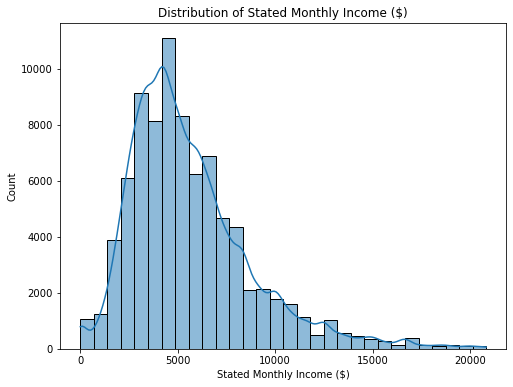

In [33]:
plt.figure(figsize = [8, 6])
sb.histplot(data = Income, x = 'StatedMonthlyIncome', bins=30, kde=True).set_title("Distribution of Stated Monthly Income ($)");
plt.xlabel('Stated Monthly Income ($)');

**Distribution of Montly Loan Payment ($)**

MonthlyLoanPayment : The scheduled monthly loan payment.

From the histogram I found that most of Prosper loan are less than  1K, indicates the prospers services are mainly on personal loans.

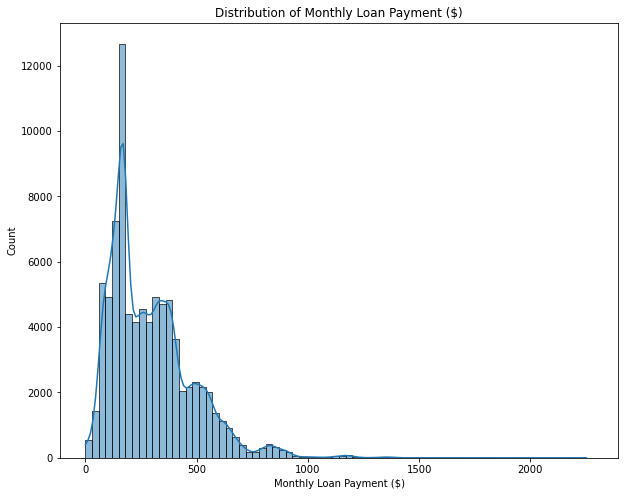

In [34]:
plt.figure(figsize = [10, 8])
sb.histplot(data = df, x = 'MonthlyLoanPayment',binwidth=30, kde=True ).set_title("Distribution of Monthly Loan Payment ($)");
plt.xlabel('Monthly Loan Payment ($)');

**Distribution of Listing Category**

**Listing Category**	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

I found that the most popular services offered by  Prosper are 1-Debt Consolidation, 2-Home Improvement, 7-Other and 3-Business.

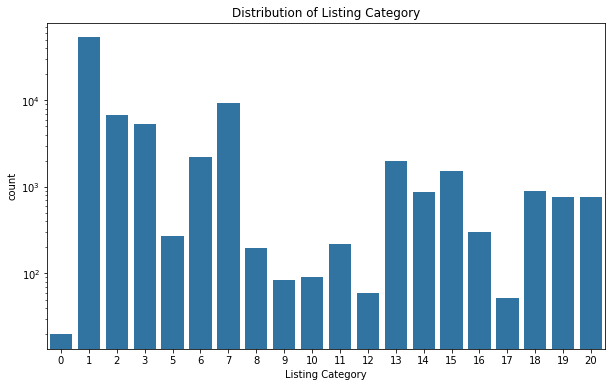

In [35]:
plt.figure(figsize = [10, 6])
gg = sb.countplot(data = df, x = 'ListingCategory (numeric)', color = default_color);
gg.set_yscale("log");
gg.set_title("Distribution of Listing Category")
plt.xlabel('Listing Category');

**Distribution of Term, Income Range and Loan Status**

**Term** : The length of the loan expressed in months.

Most loans are 36 month terms in this dataset.

**IncomeRange** : The income range of the borrower at the time the listing was created.

Borrowers' income are mostly below 75,000$ per year.

**LoanStatus** : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

Most loans are in these current days or completed.

In [36]:
ratings_ordered = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

df['IncomeRange'] = pd.Categorical(df['IncomeRange'], categories=ratings_ordered, ordered=True)

In [37]:
ratings_ordered = ['Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
       'Chargedoff', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
       'Past Due (91-120 days)', 'Past Due (>120 days)']

df['LoanStatus'] = pd.Categorical(df['LoanStatus'], categories=ratings_ordered, ordered=True)

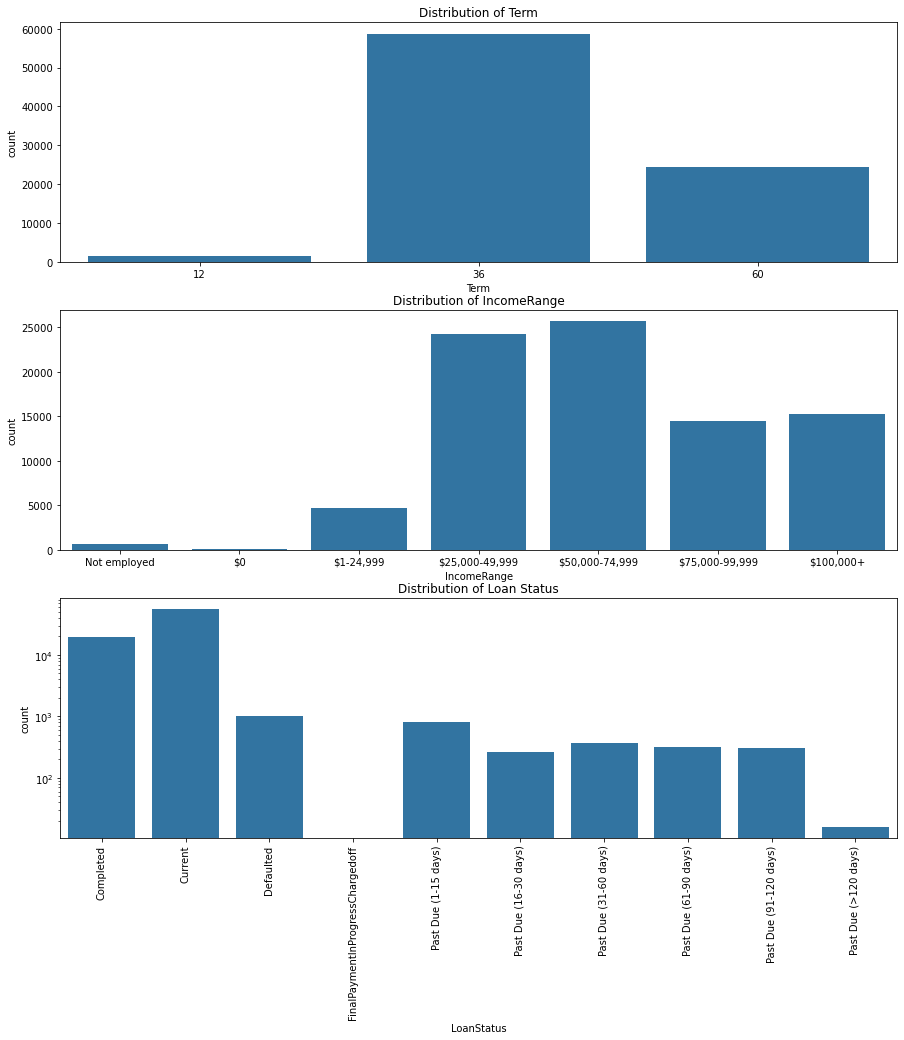

In [38]:
fig, ax = plt.subplots(nrows=3,figsize = [15, 15])
sb.countplot(data = df, x = 'Term', color = default_color, ax = ax[0]).set_title("Distribution of Term");
sb.countplot(data = df, x = 'IncomeRange', color = default_color, ax = ax[1]).set_title("Distribution of IncomeRange");
gg = sb.countplot(data = df, x = 'LoanStatus', color = default_color, ax = ax[2]);
gg.set_yscale("log");
gg.set_title("Distribution of Loan Status")
plt.xticks(rotation=90);

**Distribution of Occupation**

**Occupation** : is the occupation selected by the Borrower at the time they  created the listing.

We dicoverd that the top five  occupations counts are Other, Professtional, computer programmer, Excutives and Teacher.

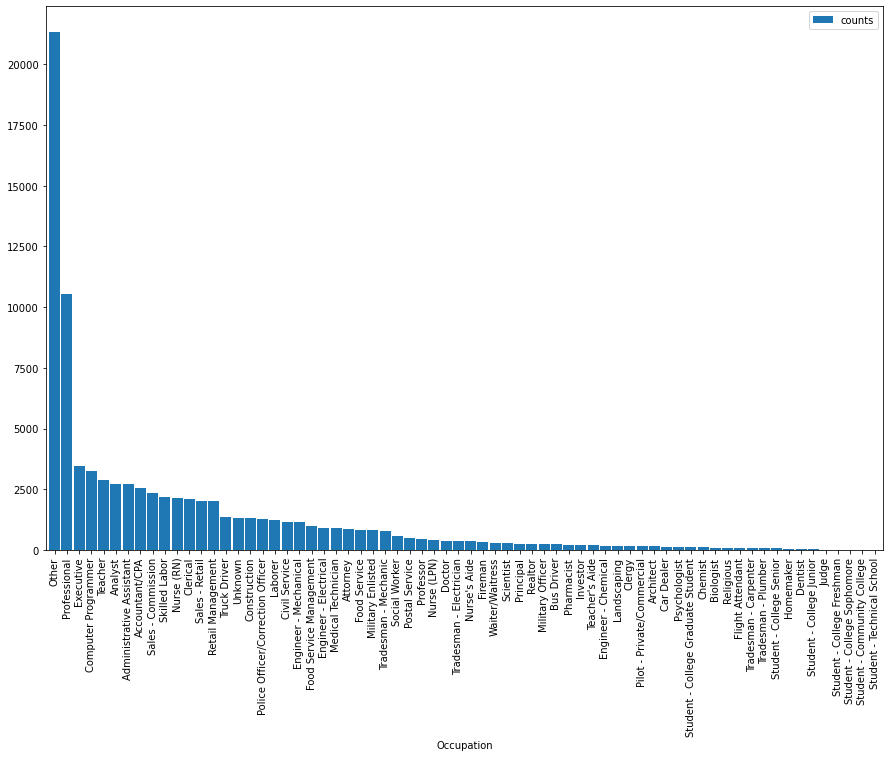

In [39]:
Occupation = df.groupby('Occupation').size().reset_index(name='counts').sort_values(by='counts',ascending = False)
Oc = Occupation.plot.bar(x='Occupation', y='counts',width=0.9 , figsize=(15,10))

I first plot the histogram.  The range of the counts for occupations expands from less than 100 to 20,000

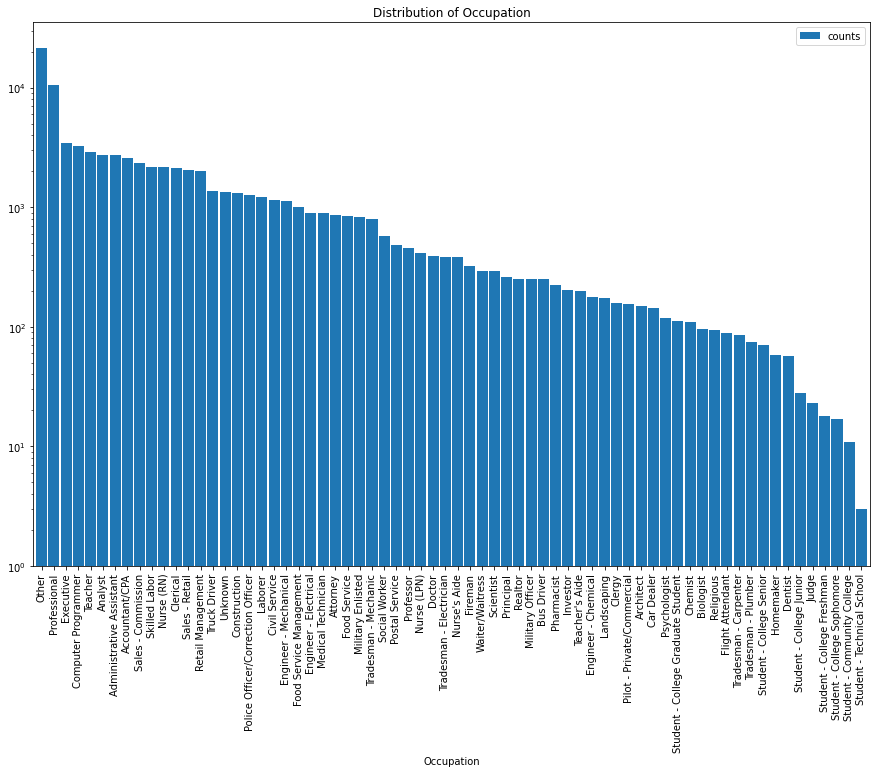

In [40]:
Oc = Occupation.plot.bar(x='Occupation', y='counts',width=0.9 ,log=True, figsize=(15,10)).set_title("Distribution of Occupation")

By plotting on a log scale to be able to see the small changes. Frome the histogram we foound that the ‘Other’ and ‘Professional’  have the largest counts but this two values doesn't provied us with usefull information so I removed this two values from the set then plot it again to be able to see the small differene.

In [41]:
Occupation.drop(Occupation.head(2).index,inplace = True)

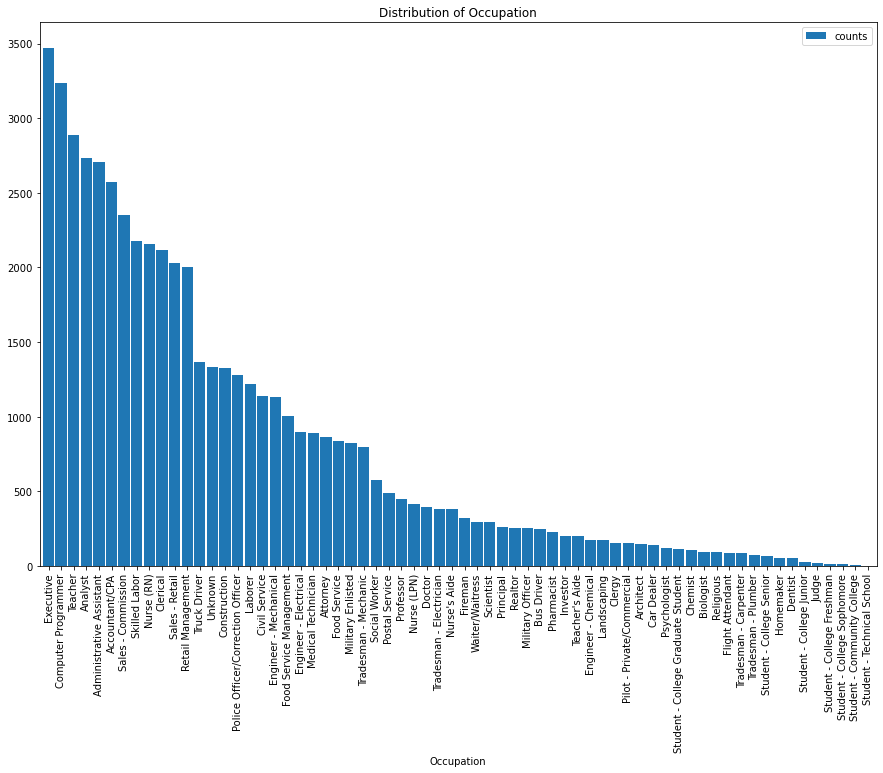

In [42]:
Oc = Occupation.plot.bar(x='Occupation', y='counts',width=0.9 , figsize=(15,10)).set_title("Distribution of Occupation")

**Distribution of Creadit Grade**

**CreditGrade** : is the credic rating was assigned at the time the listing  went live.

In [43]:
ratings_ordered = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']

loan['CreditGrade'] = pd.Categorical(loan['CreditGrade'], categories=ratings_ordered, ordered=True)

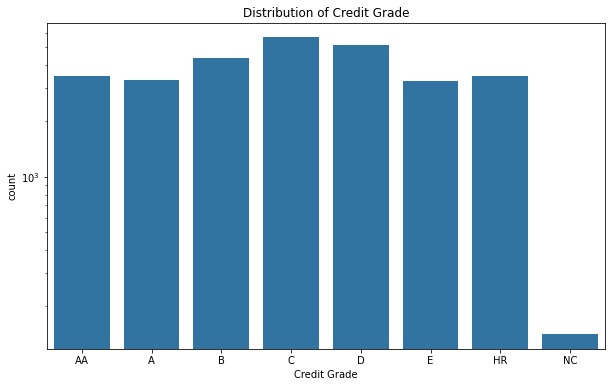

In [44]:
plt.figure(figsize = [10, 6])
gg = sb.countplot(data = loan, x = 'CreditGrade', color = default_color, );
gg.set_yscale("log");
gg.set_title("Distribution of Credit Grade")
plt.xlabel('Credit Grade');

**Distribution of Is Borrower Home Owner**

**Is Borrower Homeowner** : A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

It shows 53% do own a home & 47& do not own one.

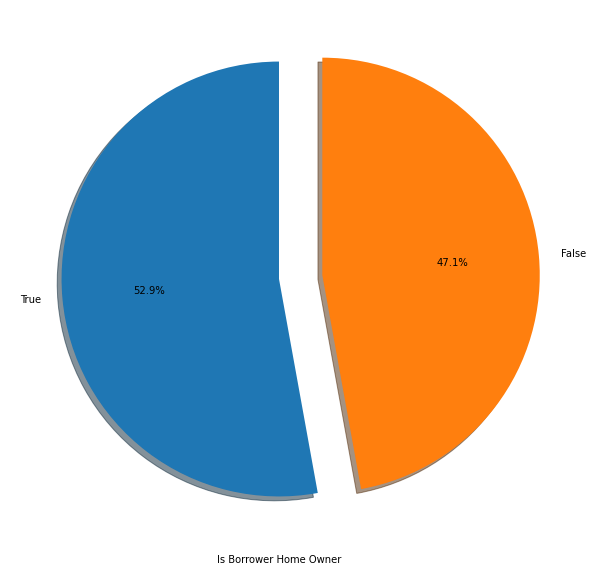

In [45]:
plt.figure(figsize = [10, 10])
plt.pie(df.IsBorrowerHomeowner.value_counts().values, labels = df.IsBorrowerHomeowner.value_counts().index,explode=[0,0.2],
        startangle = 90, autopct='%0.01f%%',shadow=True);
plt.xlabel('Is Borrower Home Owner');

## Bivariate Exploration

**Correlation Matrix And Multiple Regrission Plot**

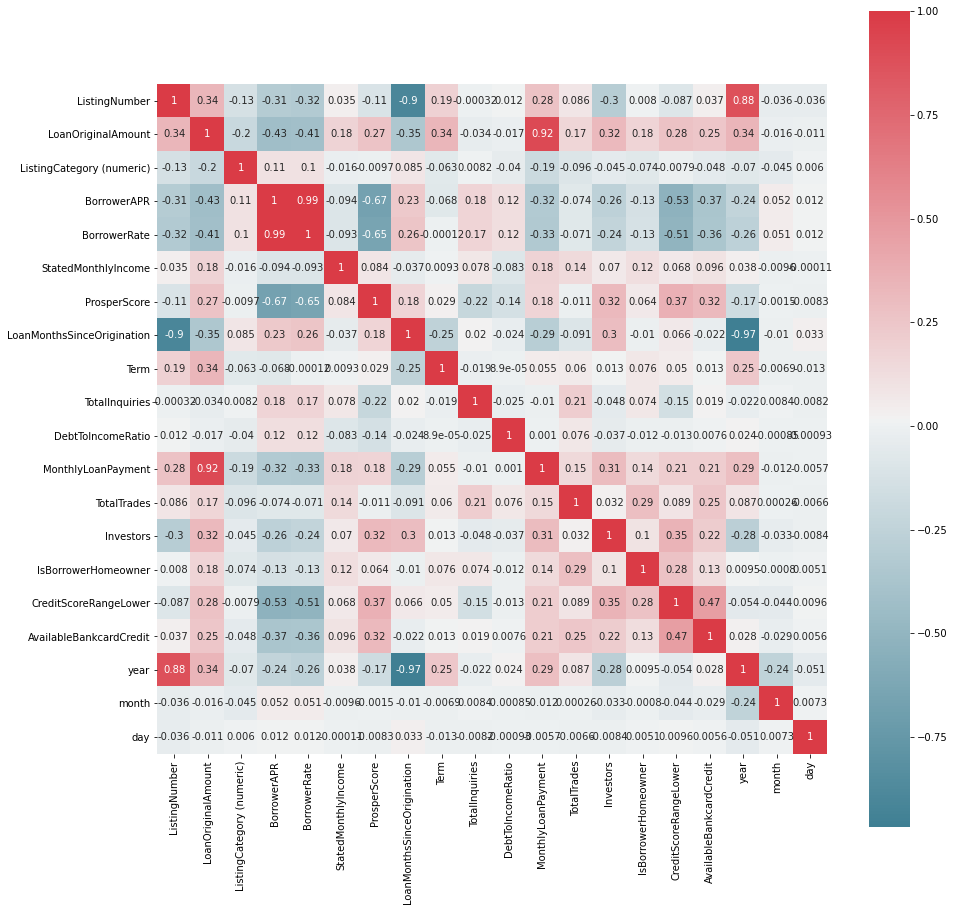

In [46]:
corrMatrix = df.corr()
plt.figure(figsize = [15, 15])
sb.heatmap(corrMatrix, mask=np.zeros_like(corrMatrix, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.show()

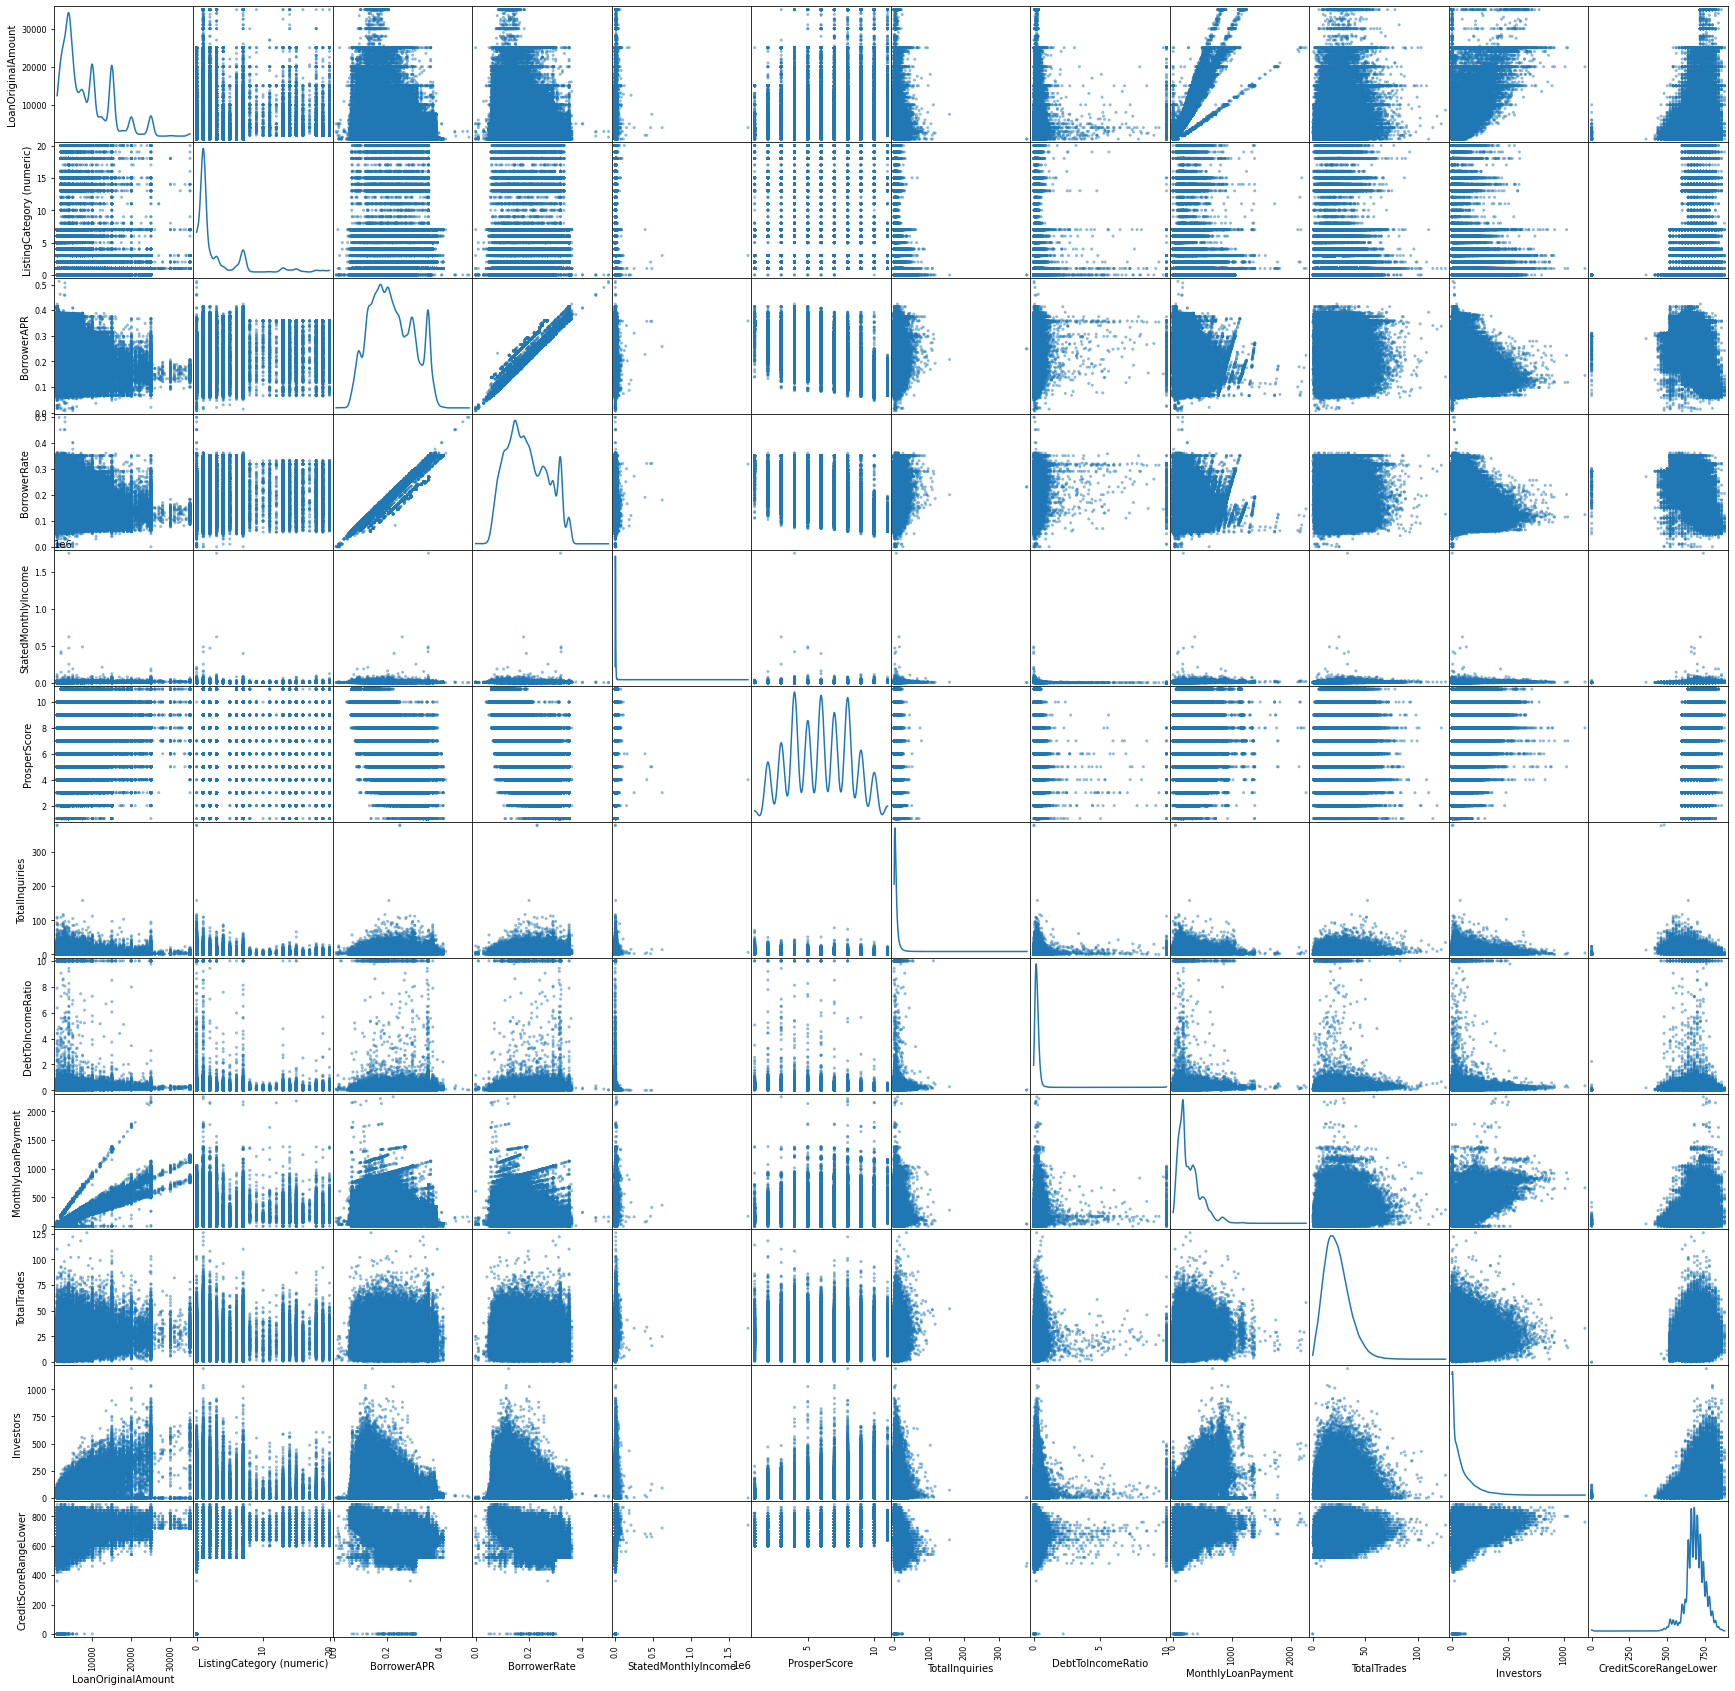

In [47]:
# Subset the dataframe by selecting features of interest
columns = ['LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 'ProsperScore',
        'Occupation','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors','CreditScoreRangeLower','IncomeRange']
pl = loan[columns]
pd.plotting.scatter_matrix(pl, diagonal='kde', figsize = (30,30));

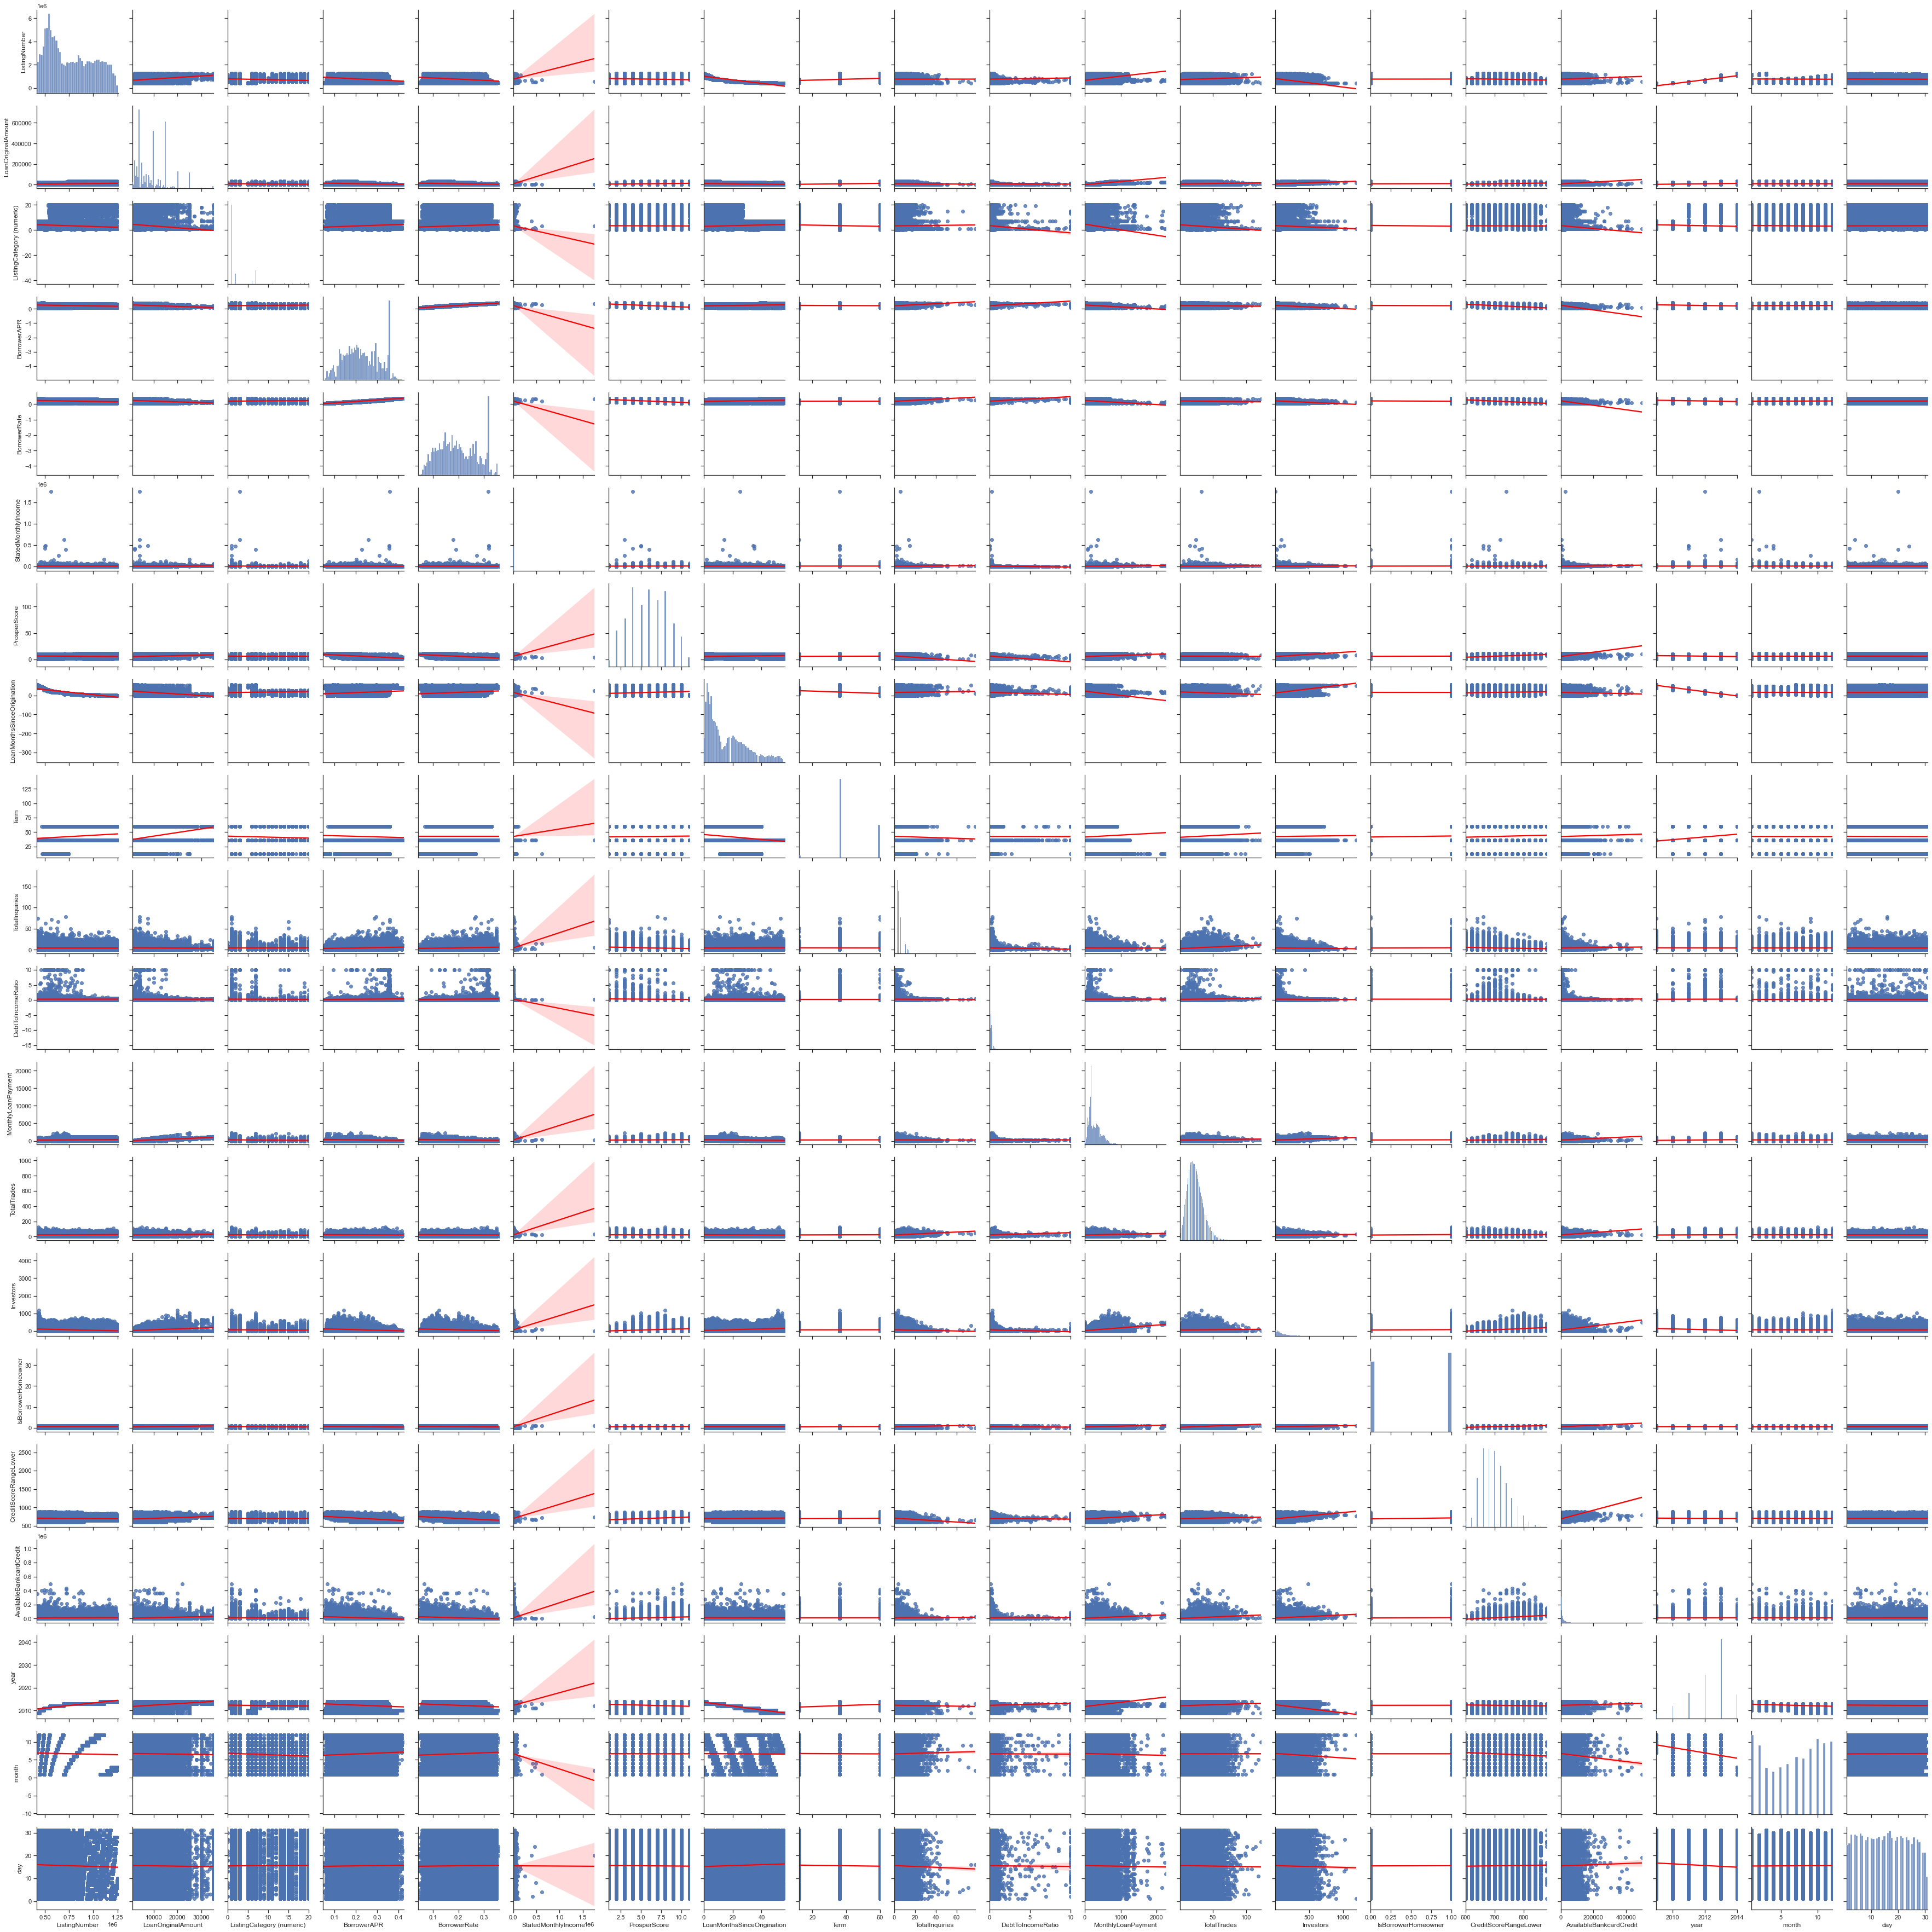

In [48]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = df
g = sns.pairplot(iris, kind="reg", plot_kws={'line_kws':{'color':'red'}})
replacements = {'sepal_length': r'$\alpha$', 'sepal_width': 'sepal',
                'petal_length': r'$\beta$', 'petal_width': 'petal',
                'versicolor': 'bloop'}

for i in range(4):
    for j in range(4):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

The Correlation Matrix and Regression Plot Shows Correlation between multiple features.

LoanOriginalAmount and MothlyLoanPayment, PorsperScore, Term, Investors, CreaditScoreRangeLower, Year.
Year and LoanMonthlysinceOrigination, Term, MothlyLoanPayment.

BorrowerAPR and PorsperScore, MothlyLoanPayment, BorrowerRate, CreaditScoreRangeLower, AvailableBankcardCreadit, LoanOriginalAmount.

BorrowerRate and PorsperScore, MothlyLoanPayment, CreaditScoreRangeLower, AvailableBankcardCreadit, LoanOriginalAmount.

MothlyLoanPayment and Investors.

## Multivariate Exploration

**Time vs Borrower Rate**

We Choose to plot borrower rate with month over years To reduce the noises & Months over all. Now the plot shows clearly how interest rates changed over time. However, there’s no obvious seasonal fluctuation or monotonic behaviors. Time may not be a good independent variable to predict the borrower’s interest rate.

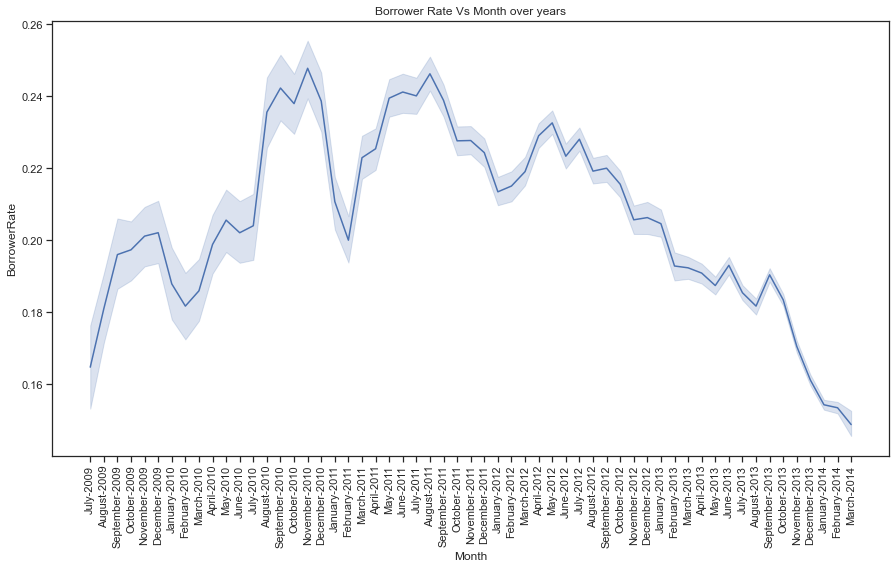

In [49]:
gr = df.sort_values("ListingCreationDate", axis = 0, ascending = True)
plt.figure(figsize = [15, 8])
sb.lineplot(x="mnth_yr", y="BorrowerRate",  data=gr).set_title("Borrower Rate Vs Month over years");
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("BorrowerRate")
plt.show()

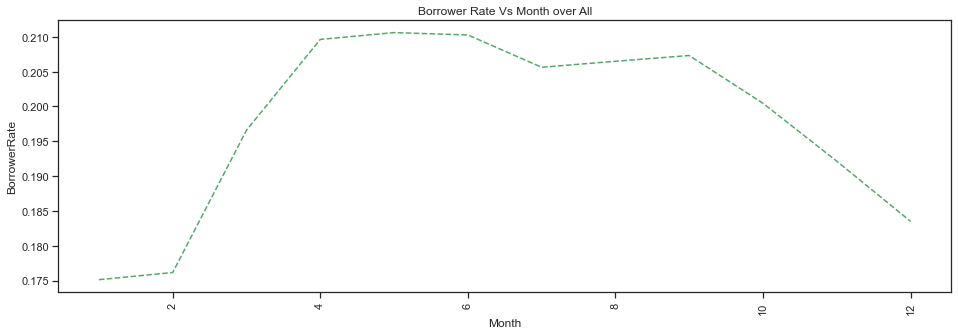

In [50]:
grp = df.groupby('month')
plt.figure(figsize=(16,5))
plt.plot(grp["BorrowerRate"].agg(np.mean),'r--',color='g')
plt.xticks(rotation=90)
plt.title("Borrower Rate Vs Month over All")
plt.xlabel("Month")
plt.ylabel("BorrowerRate")
plt.show()

**Years vs Borrower Rate**

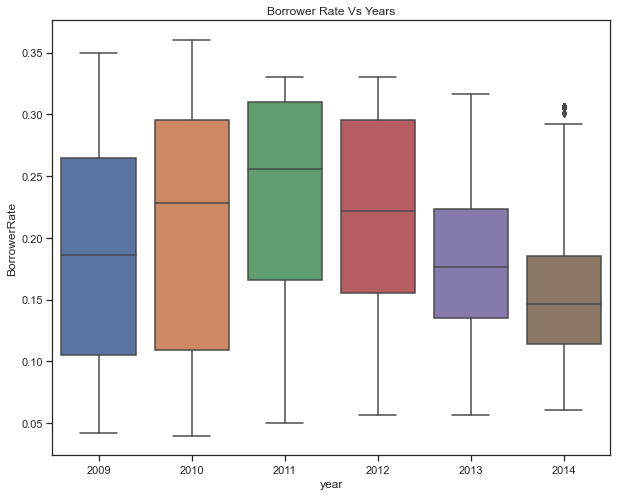

In [51]:
plt.figure(figsize = [10, 8])
sb.boxplot(x="year", y="BorrowerRate",  data=df).set_title("Borrower Rate Vs Years");
plt.show()

**AvailableBankcardCredit vs. BorrowerRate**

**AvailableBankcardCredit** : is total available credit via bank card.  It can be an indicator of a borrower’s credit history.

A reasonable guess is that a higher available bank card credit will lower your interest rate. This guess is proved to be true from following plot. The points are clustered at the bottom left corner, when a borrower has relatively low credit amount (<25,000) the probabilities of getting low and high interest rates are similar. However, when the borrower’s credit amount is high (>50,000), he/she is more likely to get a lower interest rate.

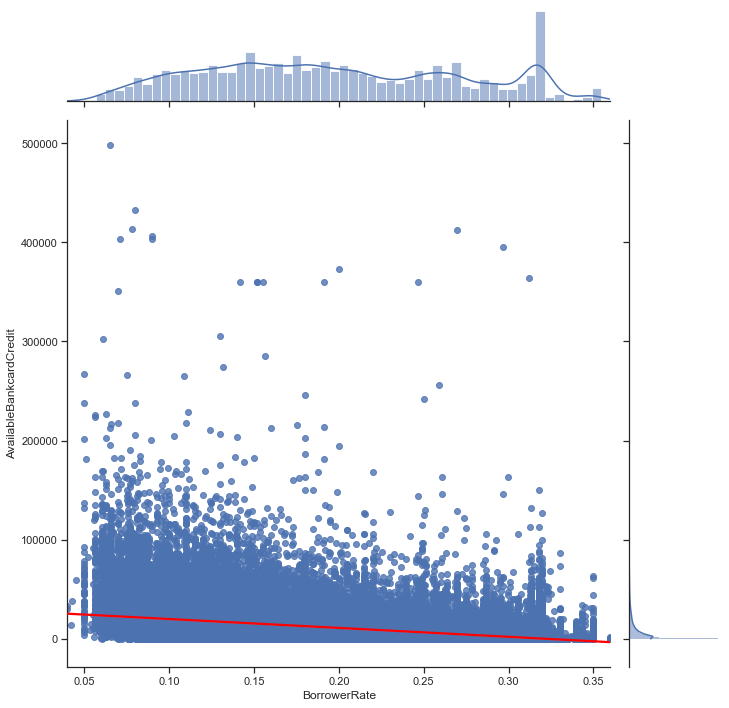

In [52]:
g = sb.jointplot(x="BorrowerRate", y="AvailableBankcardCredit", data=df,
                height=10,  kind="reg");
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5);
plt.show();

**BorrowerAPR vs LoanOriginalAmount**

This plot shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount.

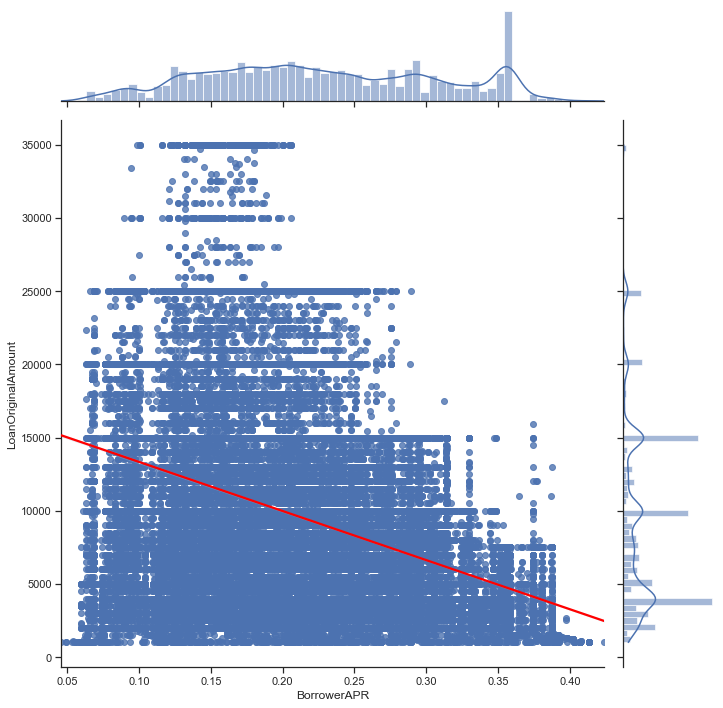

In [53]:

g = sb.jointplot(x="BorrowerAPR", y="LoanOriginalAmount", data=df,
                height=10,  kind="reg")
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
plt.show()

**Occupation vs BorrowerAPR, MonthlyLoanPayment, LoanOriginalAmount and Stated Monthly Income.**

Borrower APR vs Occupation
The borrower APR changes with the occupation,Interestingly with student in technical schools having least and college sophomores having highest average rating.

MonthlyLoanPayment vs. Occupations
The top 3 occupations have high monthly loan payment are Judge, Doctor,  and Pharmacist. 

LoanOriginalAmount vs. Occupations
Also The higest Occupation with Montly loan payment are with The highest loan Original Amount .The Loan Originak Amopunt should be positively correlated  with the monthly loan payment. The plot is consistent with salaries of each occupation.

Salary (StatedMontlyPayment) vs Occupation The Top 6 Occupation in there average Salary are Doctor, Attorney, Excecutive, Dentist and Pharmacist. The plot is consistent and positively correlated with The Loan Original and the monthly loan payment. of each occupation.

<Figure size 1440x1440 with 0 Axes>

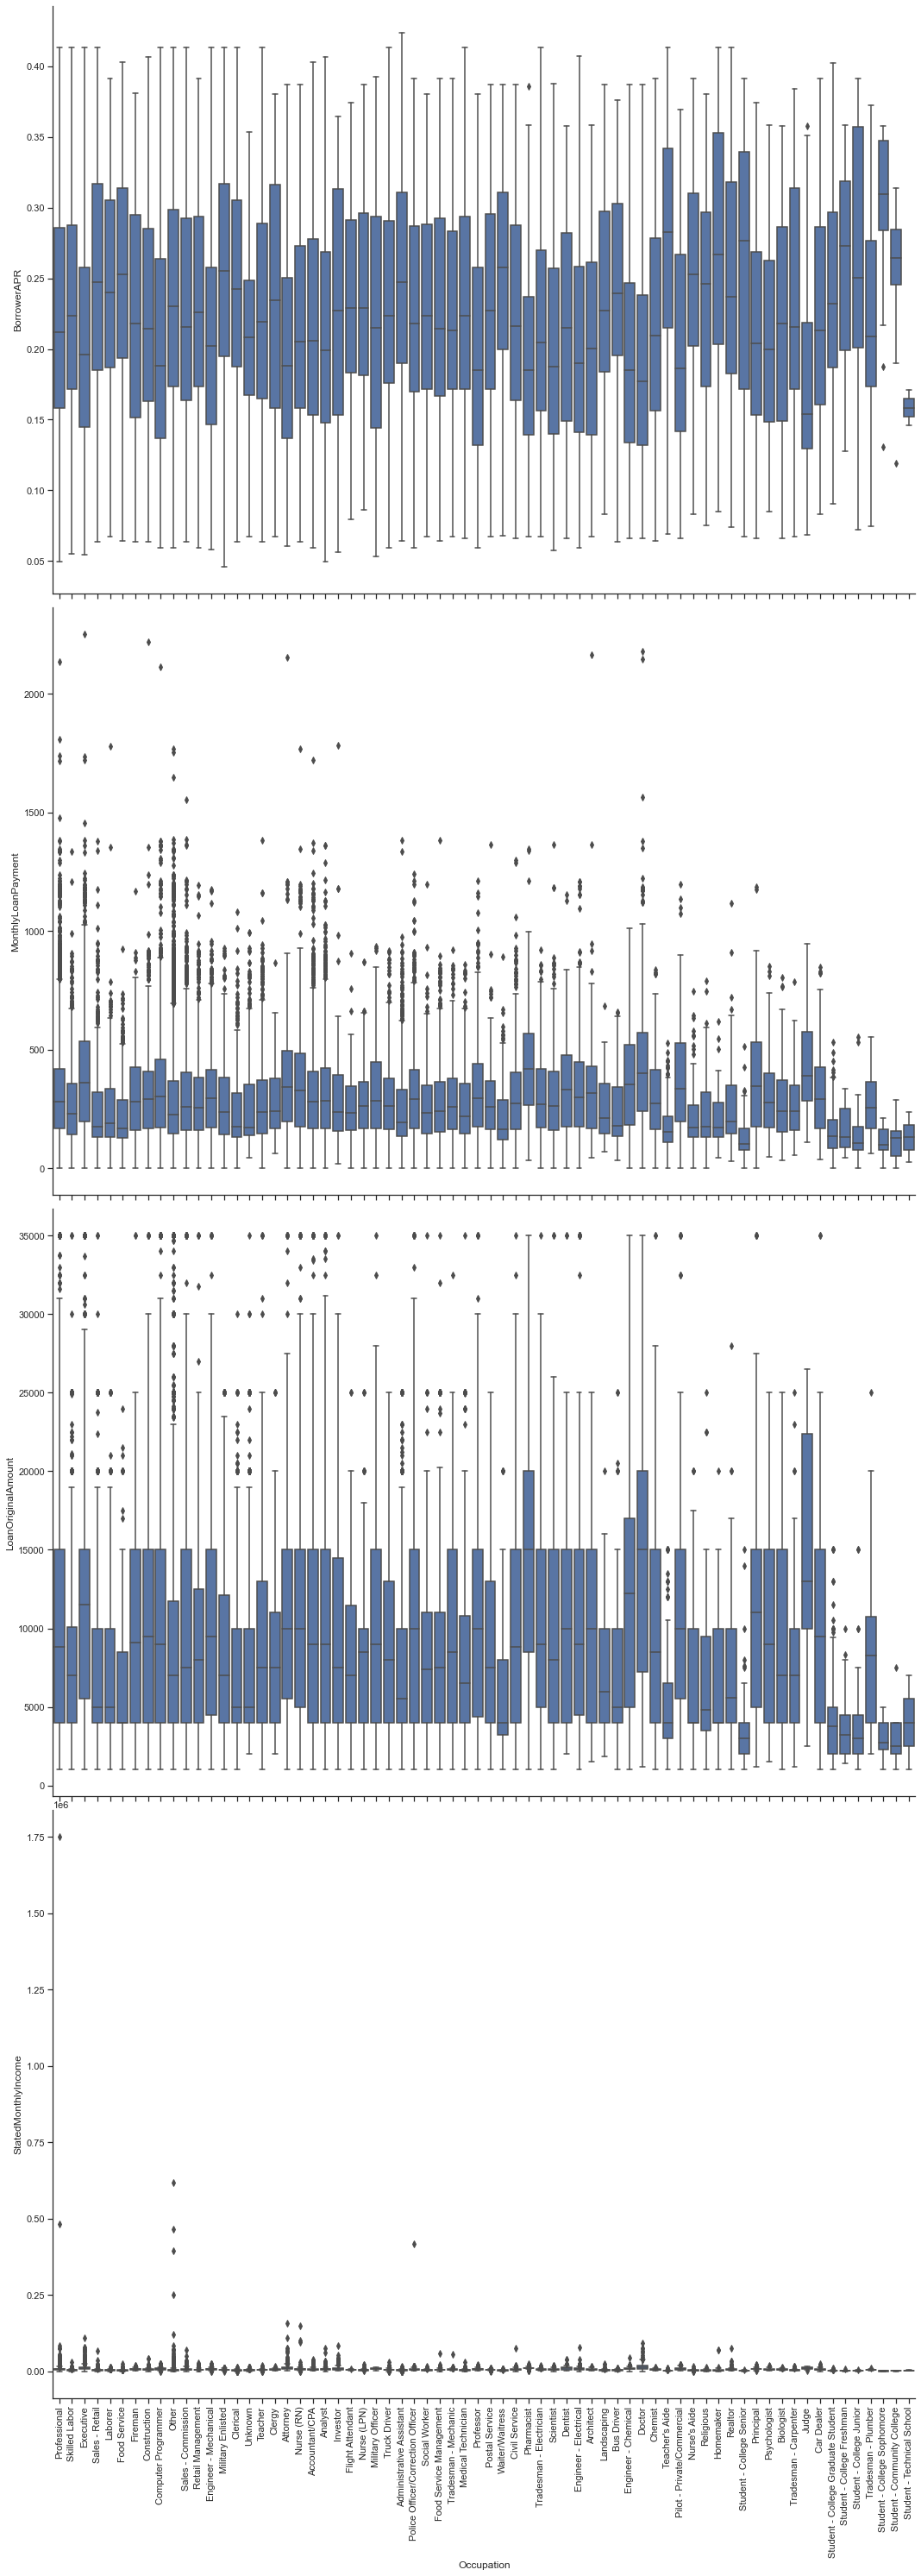

In [54]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = df, y_vars = ['BorrowerAPR', 'MonthlyLoanPayment', 'LoanOriginalAmount','StatedMonthlyIncome'], 
                x_vars = ['Occupation'] , height = 10, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);

In [55]:
OI = df.groupby('Occupation')['StatedMonthlyIncome'].mean().reset_index(name='StatedMonthlyIncome')
OI.head(5)

Occupation  StatedMonthlyIncome
0            Accountant/CPA          6591.184343
1  Administrative Assistant          3924.870784
2                   Analyst          6590.788300
3                 Architect          6726.999441
4                  Attorney         11887.362394

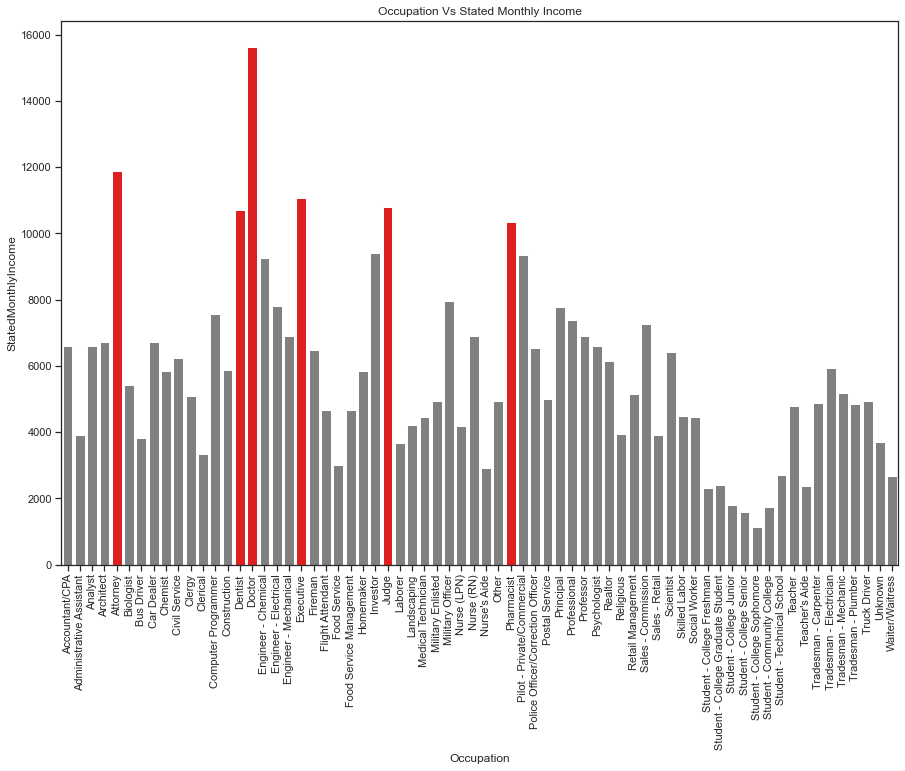

In [56]:
plt.figure(figsize = [15, 10])
clrs = ['grey' if (x < OI['StatedMonthlyIncome'].nlargest(6).min()) else 'red' for x in OI['StatedMonthlyIncome'] ]
sb.barplot(x='Occupation', y='StatedMonthlyIncome',data=OI, palette=clrs).set_title("Occupation Vs Stated Monthly Income")
plt.xticks(rotation=90);

**Occupation vs ProsperRating (Alpha)**

The Occupation with the top salary like Doctor, Judge, Executive, Attorney, Dentist have a comman top Rate which is A Rated, The most comman top Rate in most Occupation is C Rate.

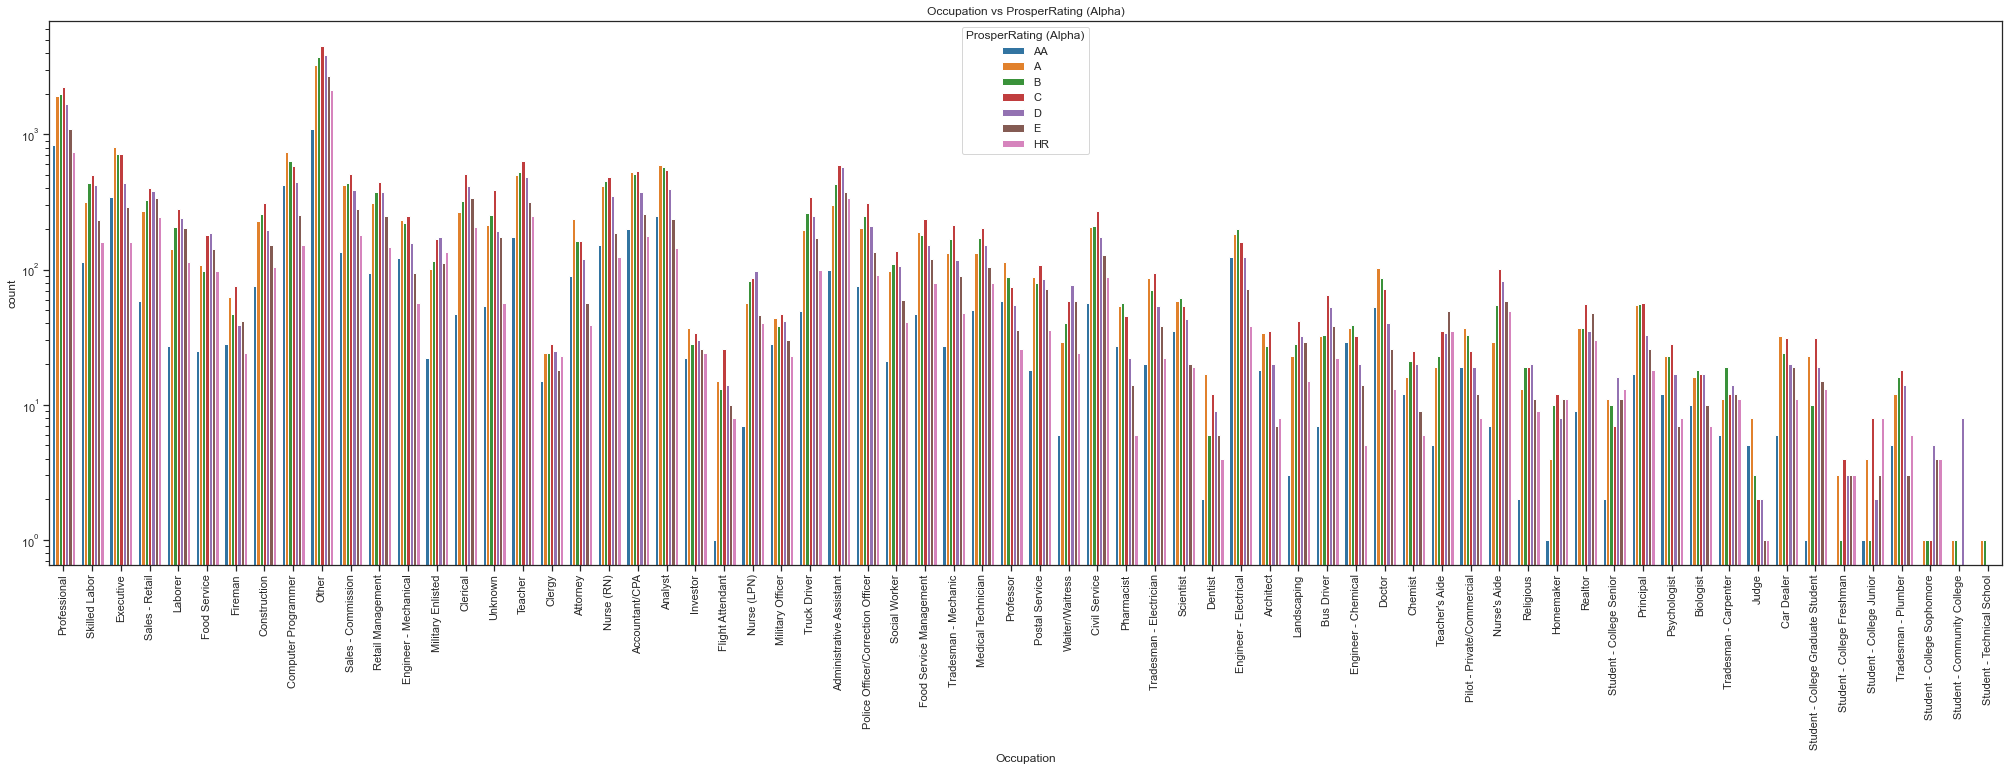

In [57]:
plt.figure(figsize = [35,10])
p=sb.countplot(data = df, x = 'Occupation', hue = 'ProsperRating (Alpha)', palette = 'tab10');
p.set_yscale("log");
p.set_title("Occupation vs ProsperRating (Alpha)")
plt.xticks(rotation=90);

**EmploymentStatus vs ProsperRating (Alpha), Term**

Interestingly, it appears that there are some positive relationships between the categorical variables and the two numeric variables of interest. The loans with 60-month term loans were quite popular with those with a ProsperRating of A and C. As seen before 36-month term loans are the most popular across all credit risk groups.

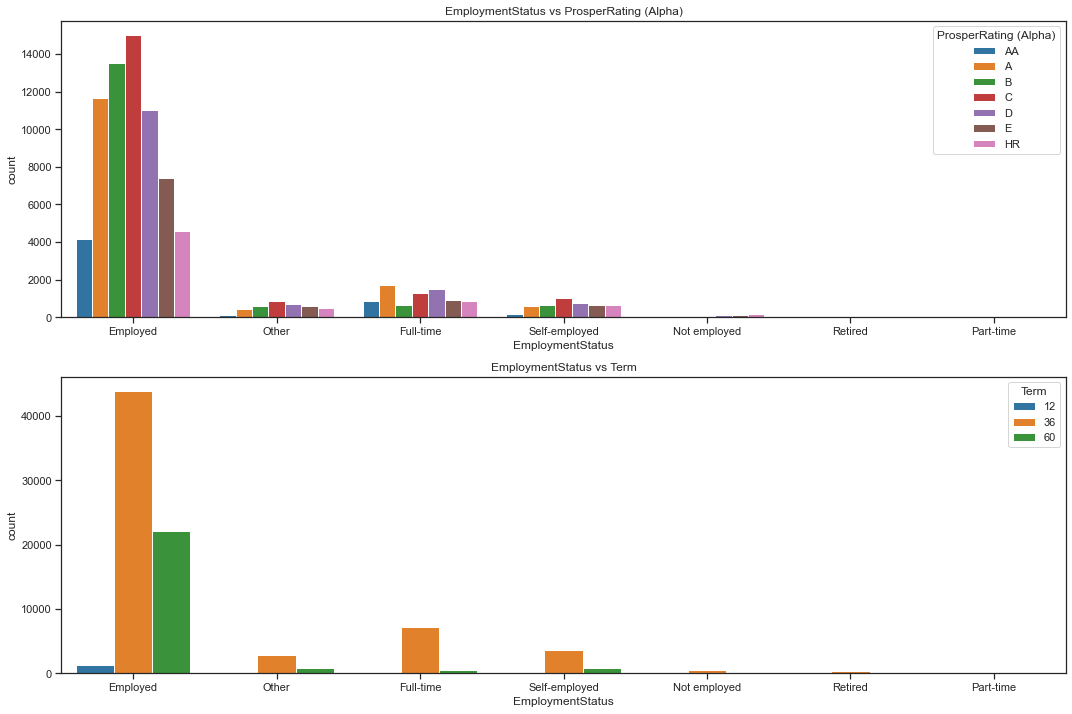

In [58]:
plt.figure(figsize = [18,12])
plt.subplot(2, 1, 1)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'tab10').set_title("EmploymentStatus vs ProsperRating (Alpha)");

plt.subplot(2, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'tab10').set_title("EmploymentStatus vs Term");

**The stated monthly income changes for different loan Terms when split up by ProsperRating (Alpha)**

The stated monthly income change with the increase in the borrow term and ratings on an average.

**Loan original amount changes for different loan Terms when split up by ProsperRating (Alpha)**

But for the loan amount, there is an interaction between term and rating. We can see that with a better Prosper rating, the loan amount of all three terms increases, the increased amplitude of loan amount between terms also becomes larger.

**The Borrower APR changes for different loan Terms when split up by ProsperRating (Alpha)**

Interestingly, the borrower APR decreases with the increase of borrow term for people with HR & C ratings. But for people with B & AA ratings, the APR increase with the increase of borrow term.

**The BorrowerRate changes for different loan Terms when split up by ProsperRating (Alpha)**

This seems to not make sense but for every single level of the ProsperRating, the BorrowerRate increases as for longer-term loans. I would think it to be the reverse as shorter-term loans usually carry a higher interest rate. This was not at all evident in the bivariate analysis and comes a bit as a surprise.

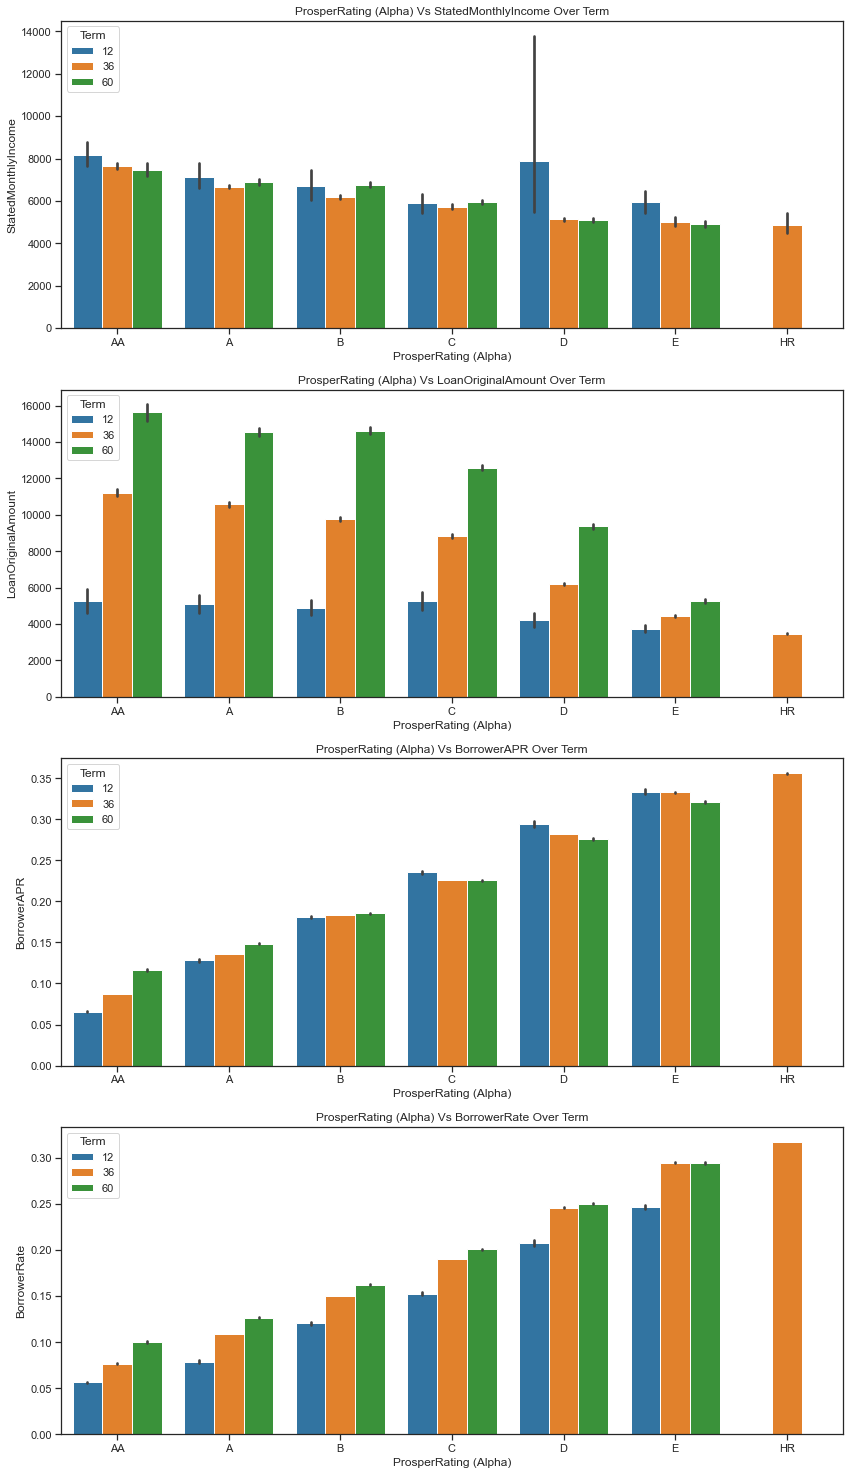

In [59]:
plt.figure(figsize=[14,26])
plt.subplot(4,1,1)
sb.barplot(data = df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'tab10').set_title("ProsperRating (Alpha) Vs StatedMonthlyIncome Over Term")
plt.subplot(4,1,2)
sb.barplot(data = df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'tab10').set_title("ProsperRating (Alpha) Vs LoanOriginalAmount Over Term")
plt.subplot(4,1,3)
sb.barplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'tab10').set_title("ProsperRating (Alpha) Vs BorrowerAPR Over Term")
plt.subplot(4,1,4)
sb.barplot(data=df, x='ProsperRating (Alpha)', y='BorrowerRate', hue='Term',
                   palette='tab10').set_title("ProsperRating (Alpha) Vs BorrowerRate Over Term");

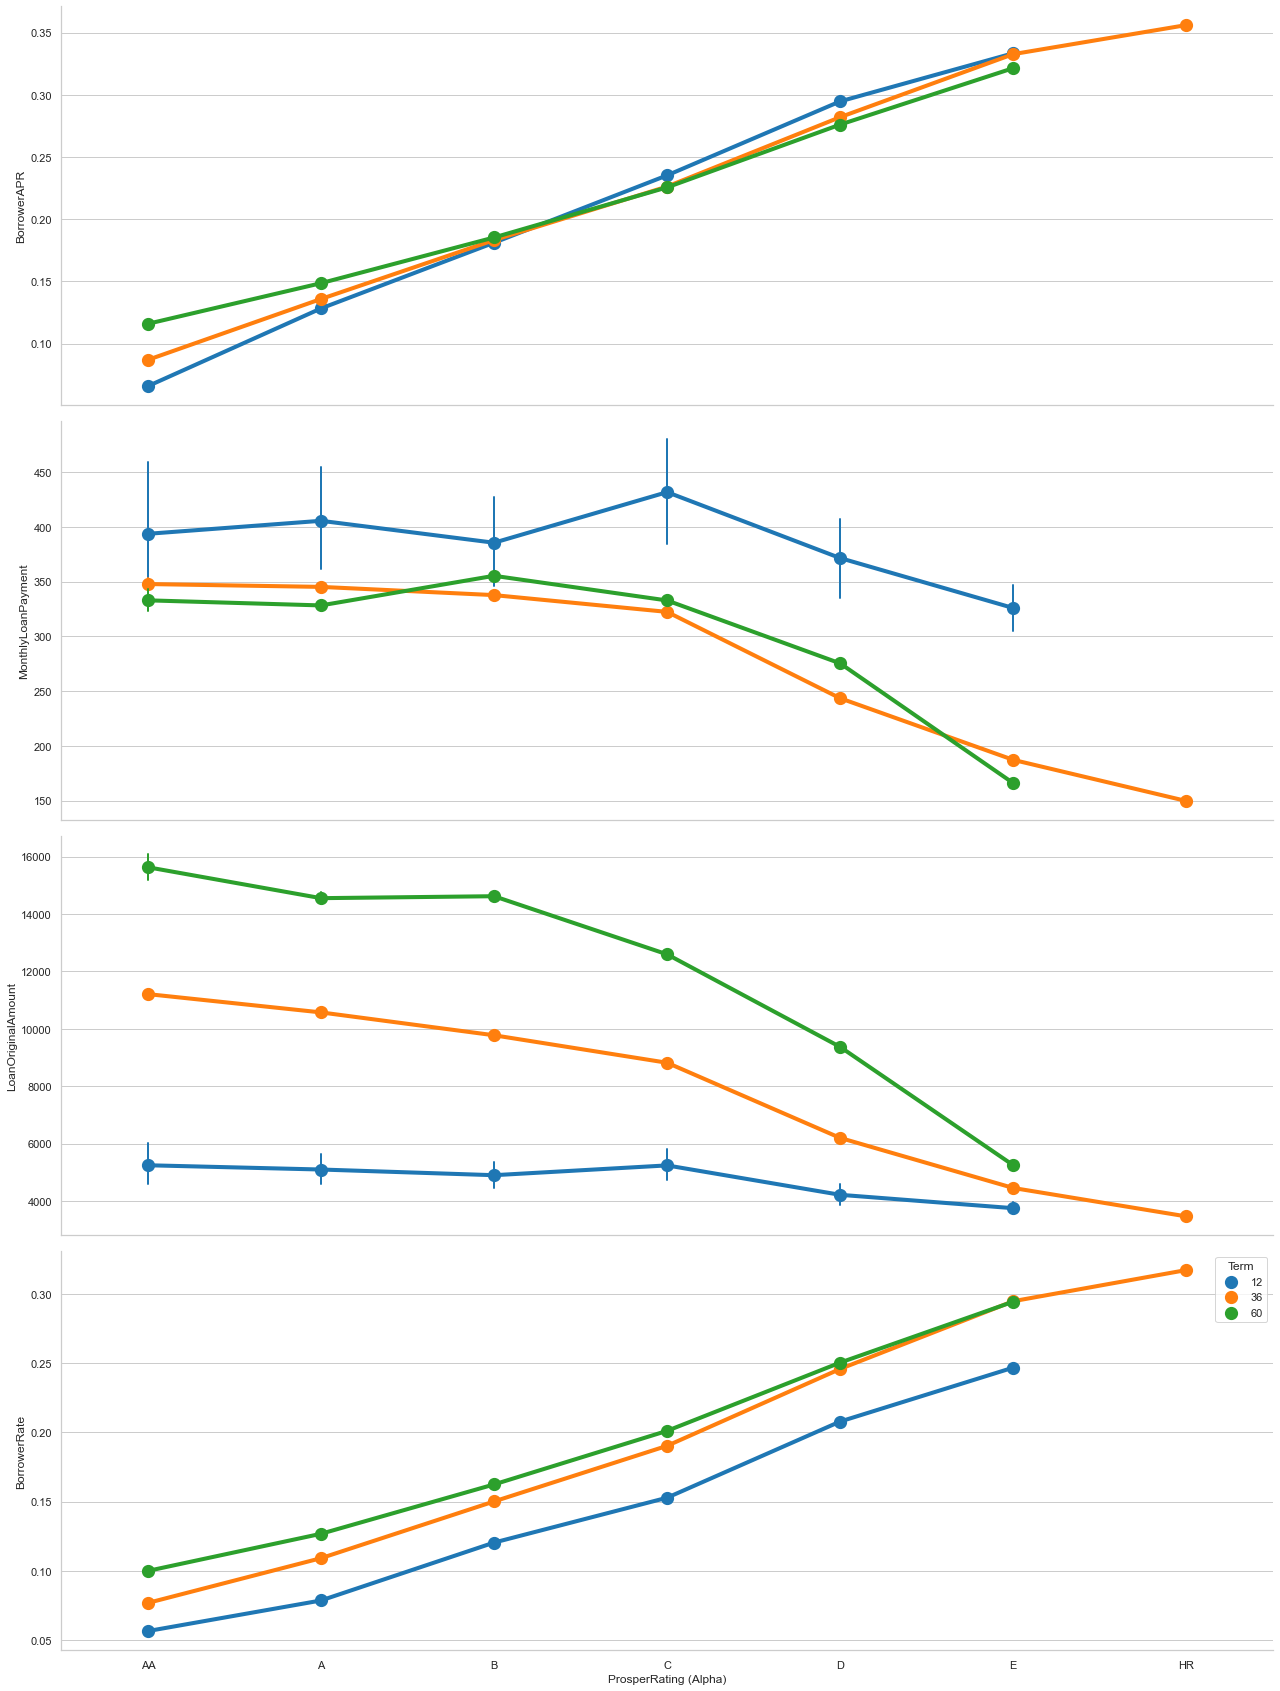

In [60]:
sb.set_theme(style="whitegrid")

# Set up a grid to plot survival probability against several variables
g = sb.PairGrid(data = df, y_vars = ['BorrowerAPR', 'MonthlyLoanPayment', 'LoanOriginalAmount','BorrowerRate'], 
                x_vars = ['ProsperRating (Alpha)'] , height = 6, aspect = 3, hue = 'Term', palette='tab10')
# Draw a seaborn pointplot onto each Axes
g.map(sb.pointplot, scale=1.5, errwidth=2, color="xkcd:plum");
plt.legend(loc=1, title='Term');

**Interest Rate vs. Time vs. Catagory**

**ListingCategory**	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

From the time series plot in last section, I didn’t get useful information about how the interest rate changes with time. So I included another variable (listing catagory) here to see if we can find any interesting trend for individual listings.

The lines for each catagory are similar with the mean plot except one huge jump for the auto loan in year 2009. But when look back to the first time series plot, I found there’s only a few data point within that time window. Thus any outlier was able to drive the line up

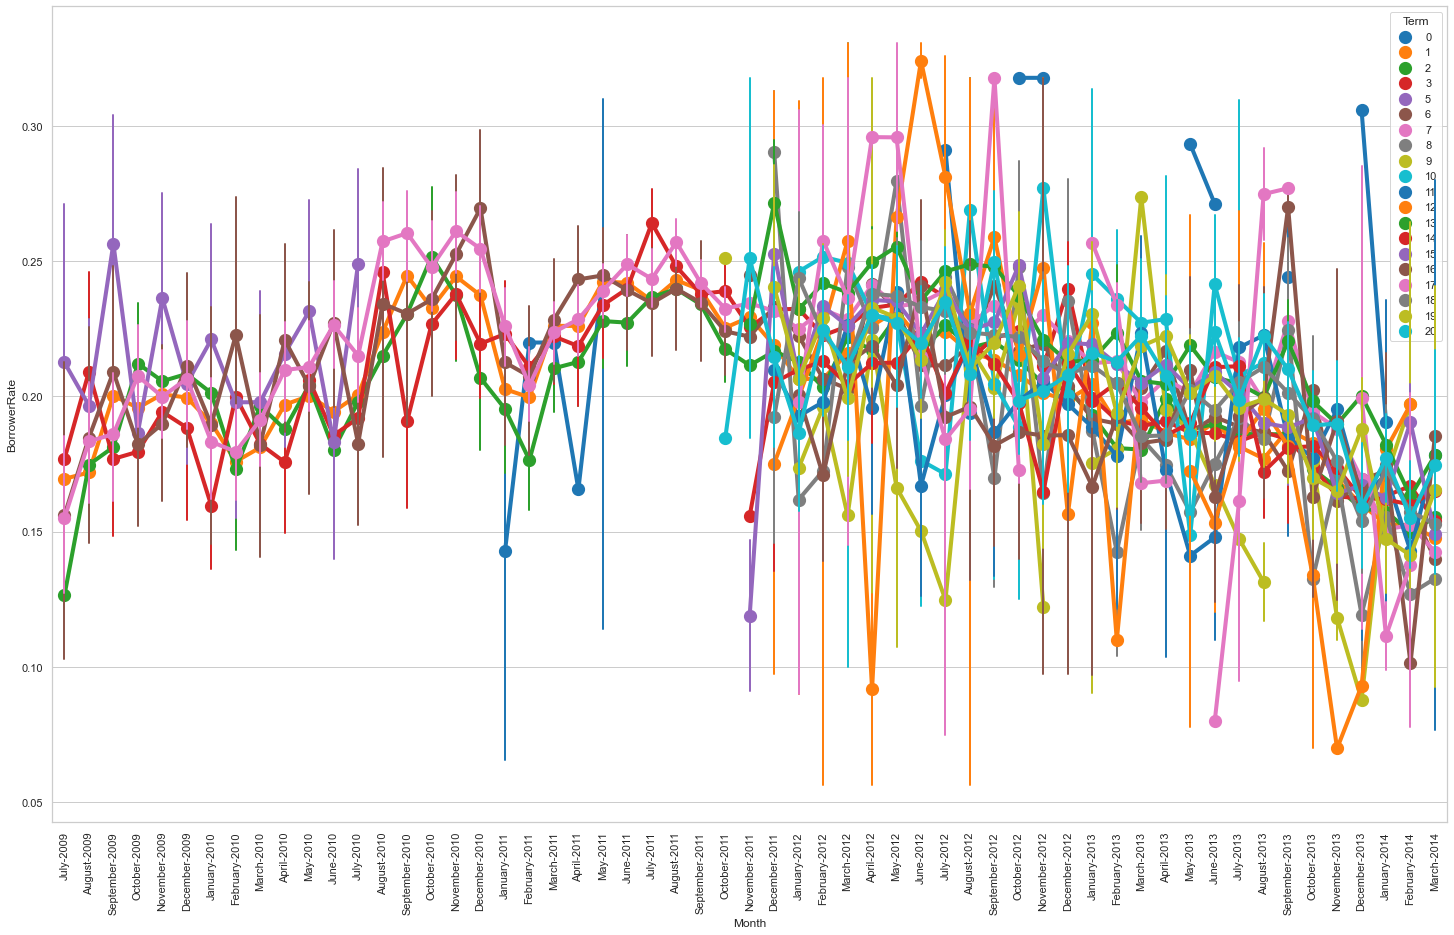

In [61]:
plt.figure(figsize = [25, 15])
g = sb.pointplot(x="mnth_yr", y="BorrowerRate", hue='ListingCategory (numeric)',style='ListingCategory (numeric)', data=gr,
palette='tab10', scale=1.5, errwidth=2, color="xkcd:plum");
plt.legend(loc=1, title='Term');
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("BorrowerRate")
plt.show()

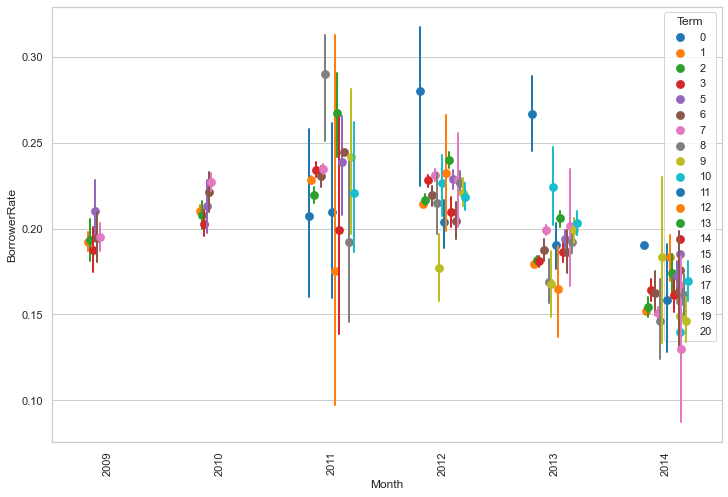

In [62]:
plt.figure(figsize = [12, 8])
sb.pointplot(x="year", y="BorrowerRate", hue='ListingCategory (numeric)',style='ListingCategory (numeric)', data=gr,
palette='tab10',linestyles = '', dodge = 0.4, scale=1, errwidth=2, color="xkcd:plum");
plt.legend(loc=1, title='Term');
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("BorrowerRate")
plt.show()

### However did the feature(s) of interest vary with alternative features within the dataset?

The borrower Annual percentage rate is negatively related to the loan original amount, that mean the additional the loan amount, the lower the Annual percentage rate. It additionally shows that at totally different size of the loan amount, the Annual percentage rate contains a higher range, however the range of Annual percentage rate decrease with the rise of loan amount. The Prosper rating additionally contains a huge impact on the receiver Annual percentage rate, that decreases with the higher rating.

### Did you observe any fascinating relationships between the opposite features (not the most feature(s) of interest)?

The loan original amount is positively related with the explicit monthly income, it is sensible since borrowers with additional monthly income may loan more cash. It additionally shows that borrowers with higher rating even have larger monthly income and loan amount. there's a interaction between prosper rating and term. proportionately, there are additional sixty month loans on B and C ratings. there's solely thirty six months loans for hr rating borrowers.

### Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger. 

### Were there any interesting or surprising interactions between features?

A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.

### Limitations
The Exploratory Data Analysis is a good way to know the data using vivid and interesting visualizations. However, to make final statement about the  relationships among variables we need to conduct statistical test and  build predictive models.